In [ ]:
#Installing Kaggle
!pip install -q kaggle


In [ ]:
# Importing all important Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import  roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Setting Kaggle Config Directory
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
# Downloading the kaggle dataset of our project
!kaggle competitions download -c porto-seguro-safe-driver-prediction

  0% 0.00/2.12M [00:00<?, ?B/s]
100% 2.12M/2.12M [00:00<00:00, 69.5MB/s]
 77% 34.0M/44.4M [00:00<00:00, 22.0MB/s]
100% 44.4M/44.4M [00:01<00:00, 43.7MB/s]
 57% 17.0M/30.0M [00:00<00:00, 64.9MB/s]
100% 30.0M/30.0M [00:00<00:00, 86.1MB/s]


In [ ]:
# Unzipping the dataset files and removing the zip files
!unzip \*.zip && rm *.zip

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   

Archive:  test.csv.zip
  inflating: test.csv                

Archive:  train.csv.zip
  inflating: train.csv               

3 archives were successfully processed.


In [ ]:
# Using pandas to read train and test data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Understading the Data
# Checking the top rows of train data
train_df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


# **EDA - Exploratory Data Analysis**

# Step 1 : Identification of Variables and Data types


In [ ]:
# Checking the Number of Rows and Columns of Train and Test Data
print("Train - Shape", train_df.shape)
print("Test - Shape", test_df.shape)

Train - Shape (595212, 59)
Test - Shape (892816, 58)


In [ ]:
# Checking the Info of Train DataSet
# The info() method prints information about the DataFrame.
# The information contains the number of columns, column labels, 
# column data types, memory usage, range index, and the number of 
# cells in each column (non-null values).
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [ ]:
# Checking the Basic Stats of Train Data
# The describe() method is used for calculating some statistical data like percentile, 
# mean and std of the numerical values of the Series or DataFrame.
# It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.
train_df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.0000

In [ ]:
# Checking the number of Unique values in each column in Train Data
train_df.nunique()

id                595212
target                 2
ps_ind_01              8
ps_ind_02_cat          5
ps_ind_03             12
ps_ind_04_cat          3
ps_ind_05_cat          8
ps_ind_06_bin          2
ps_ind_07_bin          2
ps_ind_08_bin          2
ps_ind_09_bin          2
ps_ind_10_bin          2
ps_ind_11_bin          2
ps_ind_12_bin          2
ps_ind_13_bin          2
ps_ind_14              5
ps_ind_15             14
ps_ind_16_bin          2
ps_ind_17_bin          2
ps_ind_18_bin          2
ps_reg_01             10
ps_reg_02             19
ps_reg_03           5013
ps_car_01_cat         13
ps_car_02_cat          3
ps_car_03_cat          3
ps_car_04_cat         10
ps_car_05_cat          3
ps_car_06_cat         18
ps_car_07_cat          3
ps_car_08_cat          2
ps_car_09_cat          6
ps_car_10_cat          3
ps_car_11_cat        104
ps_car_11              5
ps_car_12            184
ps_car_13          70482
ps_car_14            850
ps_car_15             15
ps_calc_01            10


In [ ]:
# Checking For null Values in Train data
train_df.isnull().values.any()

False

In [ ]:
# Checking For null Values in Test data
test_df.isnull().values.any()

False

In [ ]:
# Checking the data types of all columns in Train Data
train_df.dtypes

id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15   

In [ ]:
# Checking the Number of Numerical Features

Numerical_Features = [feature for feature in train_df.columns if train_df [feature].dtypes != 'O']

print('Number of Numerical Features: ', len(Numerical_Features))
print()

# List top rows of all the Numerical Features

train_df[Numerical_Features].head()

Number of Numerical Features:  59



,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [ ]:
# Checking the Number of Discreate Features

Discrete_Features=[feature for feature in Numerical_Features if len(train_df[feature].unique())<25]

print("Number of Discrete Features : {}".format(len(Discrete_Features)))
print()

# List top rows of all the Discrete Features

train_df[Discrete_Features].head()

Number of Discrete Features : 52



,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,10,1,-1,0,1,4,1,0,0,1,2,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,9,1,5,8,0,1,1,0,0,1
1,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,11,1,-1,0,-1,11,1,1,2,1,3,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,3,1,1,9,0,1,1,0,1,0
2,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,7,1,-1,0,-1,14,1,1,2,1,1,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,4,2,7,7,0,1,1,0,1,0
3,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,7,1,0,0,1,11,1,1,3,1,1,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,4,9,0,0,0,0,0,0
4,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,11,1,-1,0,-1,14,1,1,2,1,3,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,3,1,1,3,0,0,0,1,1,0


In [ ]:
# Checking the Number of Continous Features

Continuous_Features=[feature for feature in Numerical_Features if feature not in Discrete_Features]

print("Number of Continuous features : {}".format(len(Continuous_Features)))
print()

# List top rows of all the Continuous Features

train_df[Continuous_Features].head()

Number of Continuous features : 7



,id,ps_reg_03,ps_car_11_cat,ps_car_12,ps_car_13,ps_car_14,ps_calc_10
0,7,0.718070,12,0.400000,0.883679,0.370810,5
1,9,0.766078,19,0.316228,0.618817,0.388716,7
2,13,-1.000000,60,0.316228,0.641586,0.347275,7
3,16,0.580948,104,0.374166,0.542949,0.294958,2
4,17,0.840759,82,0.316070,0.565832,0.365103,12


In [ ]:
# To check the Names of column which are in Train Data, But which are not in Test Data

print("Names of the Column in 'train data' , But which are not in 'test data': ", set(train_df.columns) - set(test_df.columns))

Names of the Column in 'train data' , But which are not in 'test data':  {'target'}


In [ ]:
# Dropping id from test data and dropping id and terget from train data

test_id = test_df['id']

test_df.drop('id', axis=1, inplace=True)

y = train_df['target']

train = train_df.drop(['id','target'], axis=1)

In [ ]:
# Checking the percentage of Insurance claimed and Insurance not claimed
imbalance = y.value_counts()
print("Percentage of Insurance Claimed = (Class 1) : ", (imbalance[1]/train.shape[0])*100)
print("Percentage of Insurance Not Claimed = (Class 0) : ", (imbalance[0]/train.shape[0])*100)

Percentage of Insurance Claimed = (Class 1) :  3.6447517859182947
Percentage of Insurance Not Claimed = (Class 0) :  96.3552482140817


There are a total of 57 features in the dataset, which are anonymized. The feature names gave some idea about what kind of features they are:

1. Feature with 'bin' represents a binary feature.
2. Feature with 'cat' represents a categorical feature.
3. Feature with 'calc' represents a extra calculated feature.
4. Rest are continuous.

The dataset is highly imbalanced

The data contains a few -1 values which corresponds to the missing values in the dataset

In [ ]:
# Checking the Number of Rows and Columns of Train and Test Data
print("Train - Shape", train.shape)
print("Test - Shape", test_df.shape)

Train - Shape (595212, 57)
Test - Shape (892816, 57)


# Calculating Gini Coefficient

In [ ]:
# Function for calculating gini coefficient

def gini(actual, predicted, cmpcol = 0, sortcol = 1):  

  # Assert statement if length of actual is equal to length of predicted
    assert( len(actual) == len(predicted) )  

    all = np.asarray(np.c_[ actual, predicted, np.arange(len(actual)) ], dtype=np.float)  
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]  

  # To check total loss
    totalLoss = all[:,0].sum()  

  # Getting gini sum
    gini_sum = all[:,0].cumsum().sum() / totalLoss  
    gini_sum -= (len(actual) + 1) / 2  

  # gini sum divided by len of actual gives us gini coefficient
    return gini_sum / len(actual)  
  
# Function for calculating the normalized gini coefficient

def gini_normalized(a, p):  
    return gini(a, p) / gini(a, a) # calculating normalized gini coefficient


# Let's inspect the features with missing values:

In [ ]:
#  Function to calculate the percentage of missing values in each column of a Data Frame provided

def missing_values(data):
  for i in data.columns.values:
    count =  data[data[i] == -1].shape[0]
    print("Missing Values in '{}' : {:.4f} %".format(i, (count/data.shape[0])*100))

In [ ]:
# Checking missing values

cols_with_missing = []

for feature in train_df.columns:
    missings = train_df[train_df[feature] == -1][feature].count()
    if missings > 0:
        cols_with_missing.append(feature)
        missings_perc = missings/train_df.shape[0]
        
        print('Columns    {}    has    {}    records    ( {:.2%} ) with missing values'.format(feature, missings, missings_perc))
print()
print('In total, there are {} Columns with missing values'.format(len(cols_with_missing)))

Columns    ps_ind_02_cat    has    216    records    ( 0.04% ) with missing values
Columns    ps_ind_04_cat    has    83    records    ( 0.01% ) with missing values
Columns    ps_ind_05_cat    has    5809    records    ( 0.98% ) with missing values
Columns    ps_reg_03    has    107772    records    ( 18.11% ) with missing values
Columns    ps_car_01_cat    has    107    records    ( 0.02% ) with missing values
Columns    ps_car_02_cat    has    5    records    ( 0.00% ) with missing values
Columns    ps_car_03_cat    has    411231    records    ( 69.09% ) with missing values
Columns    ps_car_05_cat    has    266551    records    ( 44.78% ) with missing values
Columns    ps_car_07_cat    has    11489    records    ( 1.93% ) with missing values
Columns    ps_car_09_cat    has    569    records    ( 0.10% ) with missing values
Columns    ps_car_11    has    5    records    ( 0.00% ) with missing values
Columns    ps_car_12    has    1    records    ( 0.00% ) with missing values
Columns 

In [ ]:
# Identifying categorial, binary, calc features

all_features = train.columns.values
# Categorial features
cat_features = []
for i in train.columns.values:
    if i.endswith('cat'):
        cat_features.append(i)
    else:
        continue
# Binary features
bin_features = []
for i in train.columns.values:
    if i.endswith('bin'):
        bin_features.append(i)
    else:
        continue
# Calc features
calc_features = []
for i in train.columns.values:
    if i.startswith('ps_calc'):
        calc_features.append(i)
    else:
        continue
# Calc binary features
calc_bin_features = []
for i in calc_features:
    if i.endswith('bin'):
        calc_bin_features.append(i)
    else:
        continue

calc_num_features = list(set(calc_features) - set(calc_bin_features))
num_features_with_calc = list((set(train.columns.values) - set(cat_features)) - set(bin_features))
num_features_wo_calc = list(set(num_features_with_calc) - set(calc_features))
#num_features_wo_calc

# Univariate analysis

# 1. Categorical Features

In [ ]:
print("Total Number of cat columns : " ,len(cat_features))
print()

for i in cat_features:
   print(i)

Total Number of cat columns :  14

ps_ind_02_cat
ps_ind_04_cat
ps_ind_05_cat
ps_car_01_cat
ps_car_02_cat
ps_car_03_cat
ps_car_04_cat
ps_car_05_cat
ps_car_06_cat
ps_car_07_cat
ps_car_08_cat
ps_car_09_cat
ps_car_10_cat
ps_car_11_cat


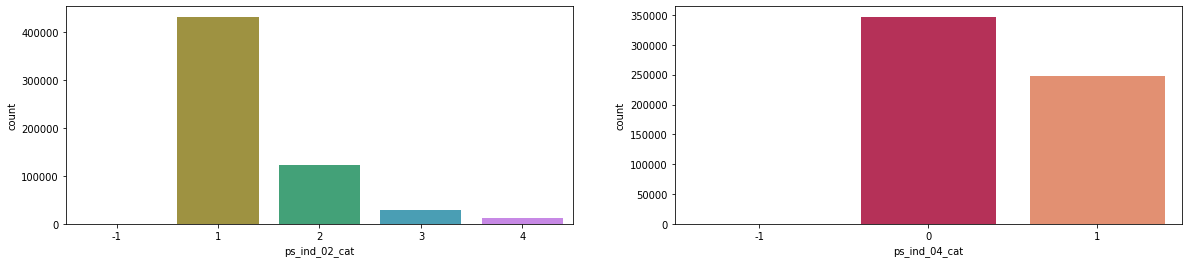

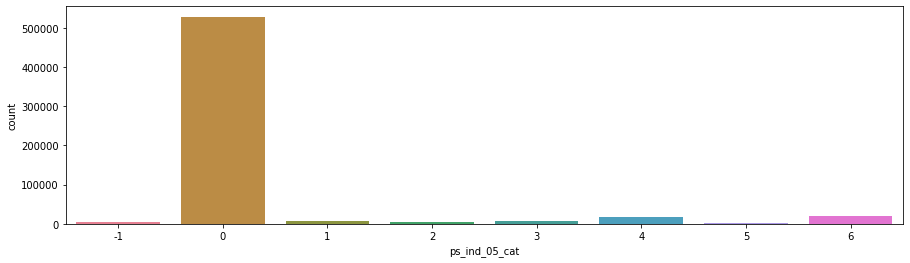

In [ ]:
# Seaborn countplots for categorical features

fig ,ax = plt.subplots(1,2,figsize=(20,4))
ax1,ax2, = ax.flatten()
sns.countplot(train_df['ps_ind_02_cat'],palette='husl',ax=ax1)
sns.countplot(train_df['ps_ind_04_cat'],palette='rocket',ax=ax2)
fig,ax = plt.subplots(figsize=(15,4))
sns.countplot(train_df['ps_ind_05_cat'],palette='husl',ax=ax)

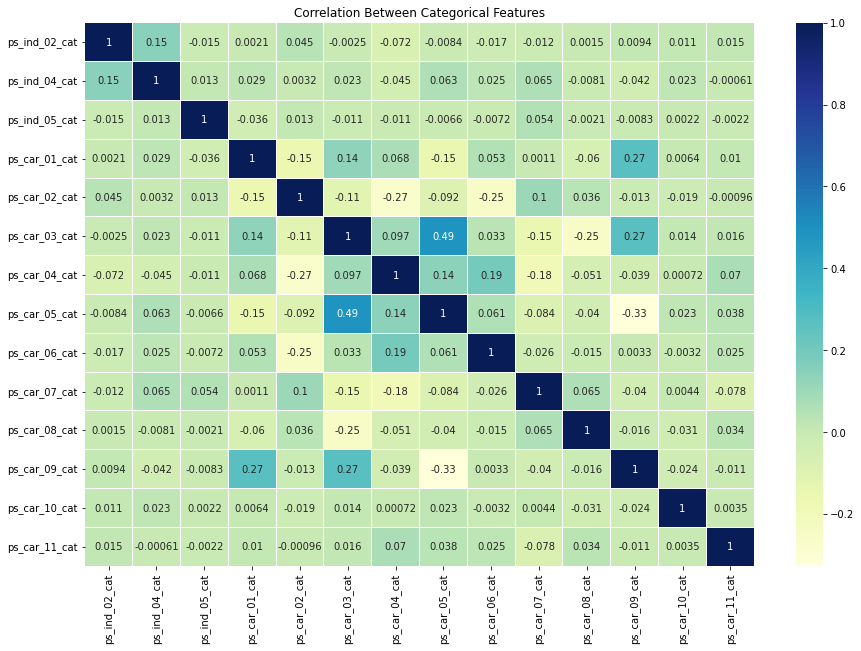

In [ ]:
# Using matplotlib and seaborn for getting correlation between Categorial features

# Setting the figure size
plt.figure(figsize=(15,10))

# Setting the title
plt.title("Correlation Between Categorical Features")

# Plot rectangular data as a color-encoded matrix.
# This is an Axes-level function and will draw the heatmap into the currently-active Axes if none is provided to the ax argument.

sns.heatmap(train_df[cat_features].corr(), cmap='YlGnBu', annot = True, linewidths=0.01)

Categorical features do not have any noticeable correlation between them.

In [ ]:
# Iterating to get the cardinality of all categorial features

for i in cat_features:
    cardinality = len(list(train_df[i].unique()))
    print("Cardinality of '{}' : {}".format(i, cardinality))

Cardinality of 'ps_ind_02_cat' : 5
Cardinality of 'ps_ind_04_cat' : 3
Cardinality of 'ps_ind_05_cat' : 8
Cardinality of 'ps_car_01_cat' : 13
Cardinality of 'ps_car_02_cat' : 3
Cardinality of 'ps_car_03_cat' : 3
Cardinality of 'ps_car_04_cat' : 10
Cardinality of 'ps_car_05_cat' : 3
Cardinality of 'ps_car_06_cat' : 18
Cardinality of 'ps_car_07_cat' : 3
Cardinality of 'ps_car_08_cat' : 2
Cardinality of 'ps_car_09_cat' : 6
Cardinality of 'ps_car_10_cat' : 3
Cardinality of 'ps_car_11_cat' : 104


As Feature 'ps_car_11_cat' has the highest cardinality, so it stands out in the categorical features. Rest all the features have relatively low cardinality.

In [ ]:
# Missing values in categorical features
missing_values(train_df[cat_features])

Missing Values in 'ps_ind_02_cat' : 0.0363 %
Missing Values in 'ps_ind_04_cat' : 0.0139 %
Missing Values in 'ps_ind_05_cat' : 0.9760 %
Missing Values in 'ps_car_01_cat' : 0.0180 %
Missing Values in 'ps_car_02_cat' : 0.0008 %
Missing Values in 'ps_car_03_cat' : 69.0898 %
Missing Values in 'ps_car_04_cat' : 0.0000 %
Missing Values in 'ps_car_05_cat' : 44.7825 %
Missing Values in 'ps_car_06_cat' : 0.0000 %
Missing Values in 'ps_car_07_cat' : 1.9302 %
Missing Values in 'ps_car_08_cat' : 0.0000 %
Missing Values in 'ps_car_09_cat' : 0.0956 %
Missing Values in 'ps_car_10_cat' : 0.0000 %
Missing Values in 'ps_car_11_cat' : 0.0000 %


The cat_features contains some missing values.
Some of the features 'ps_car_03_cat' and 'ps_car_05_cat' consists of missing values. 
For these features instead of filling the missing values, we can consider them as a separate category.

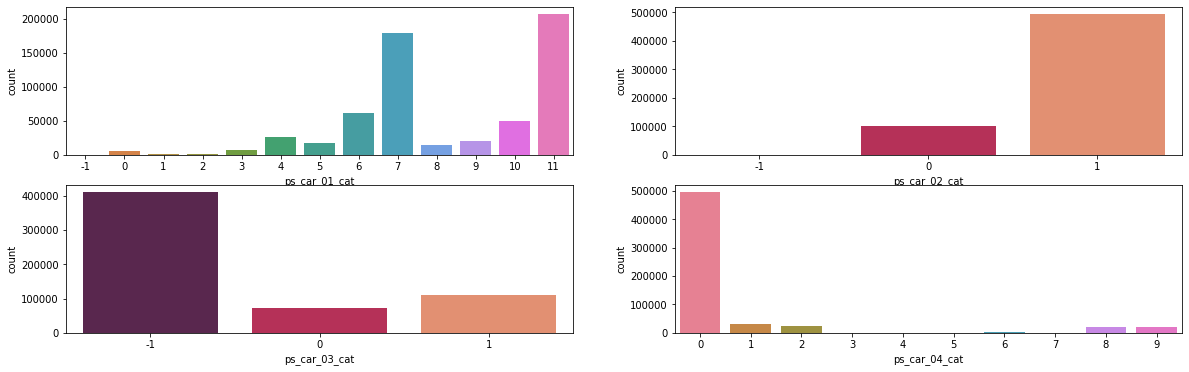

In [ ]:
# Seaborn countplots for categorical features
fig,ax = plt.subplots(2,2,figsize=(20,6))
ax1,ax2,ax3,ax4 = ax.flatten()

sns.countplot(train_df['ps_car_01_cat'],palette='husl',ax=ax1)
sns.countplot(train_df['ps_car_02_cat'],palette='rocket',ax=ax2)
sns.countplot(train_df['ps_car_03_cat'],palette='rocket',ax=ax3)
sns.countplot(train_df['ps_car_04_cat'],palette='husl',ax=ax4)

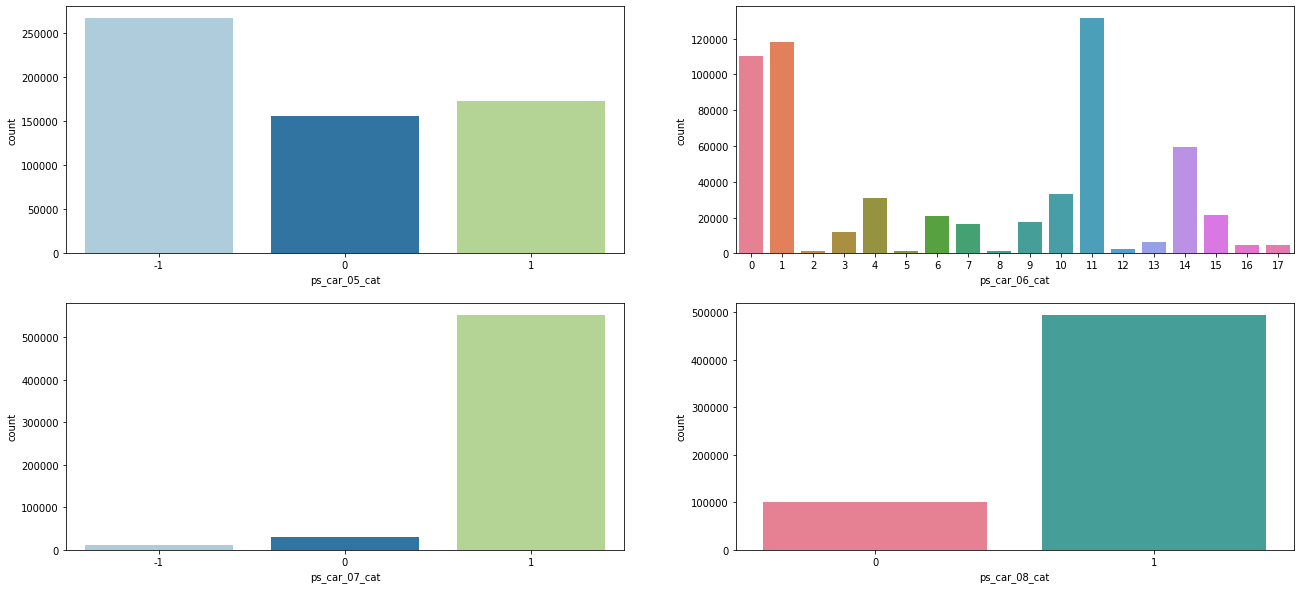

In [ ]:
# Seaborn countplots for categorical features
fig,ax = plt.subplots(2,2,figsize = (22,10))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(train_df['ps_car_05_cat'],palette='Paired',ax=ax1)
sns.countplot(train_df['ps_car_06_cat'],palette='husl',ax=ax2)
sns.countplot(train_df['ps_car_07_cat'],palette='Paired',ax=ax3)
sns.countplot(train_df['ps_car_08_cat'],palette='husl',ax=ax4)

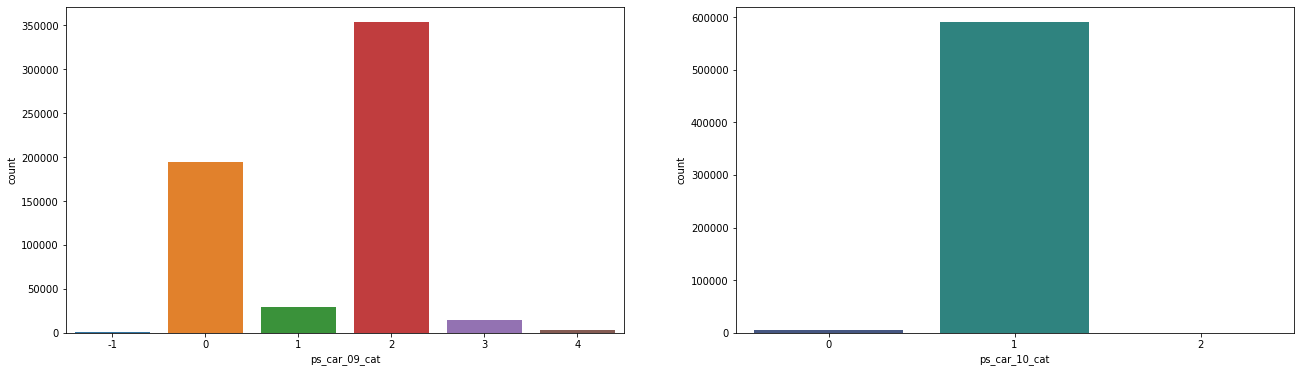

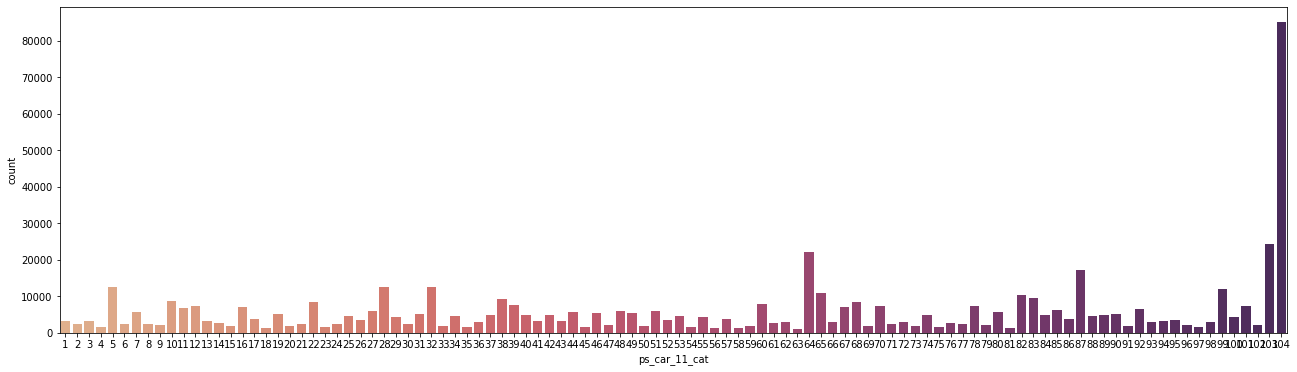

In [ ]:
# Seaborn countplots for categorical features
fig, ax = plt.subplots(1,2,figsize=(22,6))
ax1,ax2 = ax.flatten()
sns.countplot(train_df['ps_car_09_cat'],palette='tab10',ax=ax1)
sns.countplot(train_df['ps_car_10_cat'],palette='viridis',ax=ax2)

fig,ax = plt.subplots(figsize=(22,6))
sns.countplot(train_df['ps_car_11_cat'],palette='flare',ax=ax)

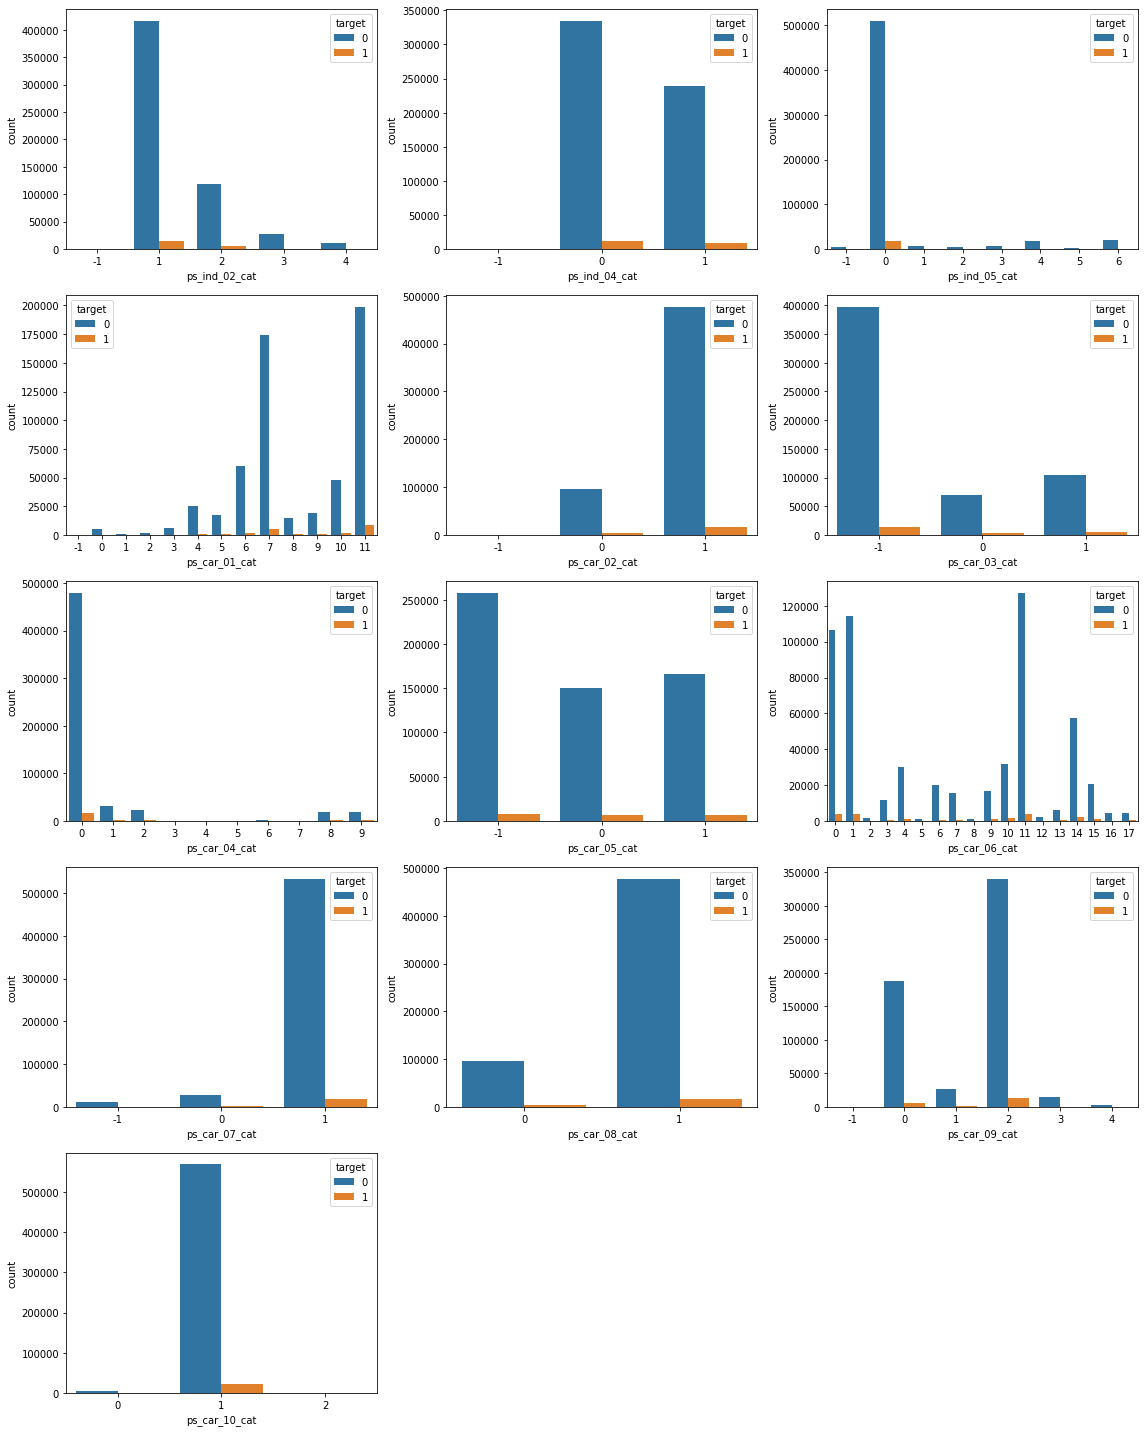

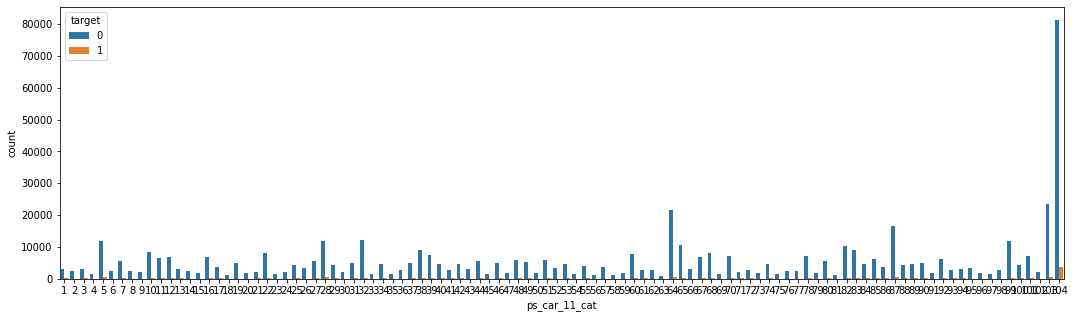

In [ ]:
# Using matplotlib and seaborn for plotting countplot of Categorical features

# Setting the figure size
plt.figure(figsize=(16,20))
# Setting the title
plt.title("Count Plots of Categorical Features")

# Iterating to plot for all Categorical features

for i in range(len(cat_features)-1):
    plt.subplot(5,3,i+1)
    sns.countplot(train_df[cat_features[i]], hue=y)
    plt.tight_layout()

# Setting the figure size
plt.figure(figsize=(18,5))
# seaborn plot for ps_car_11_cat
sns.countplot(train_df['ps_car_11_cat'], hue=y)

A. Some features like 'ps_ind_05_cat' and 'ps_car_04_cat' consists of a single value mostly. 
So we can use the mode of these features for filling their missing values.

B. The missing values of each of the categorical features can be filled as per below:

1. ps_ind_02_cat ---> mean
2. ps_ind_04_cat ---> mean
3. ps_ind_05_cat ---> mode
4. ps_car_01_cat ---> mean
5. ps_car_02_cat ---> mean
6. ps_car_03_cat ---> can be considered as a separate category
7. ps_car_05_cat ---> can be considered as a separate category
8. ps_car_07_cat ---> mode
9. ps_car_09_cat ---> mean

C. We can try different encoding methods for these features as mentioned below:

1. Label Encoding or Ordinal Encoding - We use this categorical data encoding technique when the categorical feature is ordinal. In this case, retaining the order is important. Hence encoding should reflect the sequence.

In Label encoding, each label is converted into an integer value. We will create a variable that contains the categories representing the education qualification of a person.

2. One-Hot Encoding - We use this categorical data encoding technique when the features are nominal(do not have any order). In one hot encoding, for each level of a categorical feature, we create a new variable. Each category is mapped with a binary variable containing either 0 or 1. Here, 0 represents the absence, and 1 represents the presence of that category.

3. Target Encoding - This is a Bayesian encoding technique.

Bayesian encoders use information from dependent/target variables to encode the categorical data.

In target encoding, we calculate the mean of the target variable for each category and replace the category variable with the mean value. In the case of the categorical target variables, the posterior probability of the target replaces each category

 

# 2. Binary Features

In [ ]:
# Number of binary features
print("Total Number of bin columns : " ,len(bin_features))
print()

for i in bin_features:
  print(i)

Total Number of bin columns :  17

ps_ind_06_bin
ps_ind_07_bin
ps_ind_08_bin
ps_ind_09_bin
ps_ind_10_bin
ps_ind_11_bin
ps_ind_12_bin
ps_ind_13_bin
ps_ind_16_bin
ps_ind_17_bin
ps_ind_18_bin
ps_calc_15_bin
ps_calc_16_bin
ps_calc_17_bin
ps_calc_18_bin
ps_calc_19_bin
ps_calc_20_bin


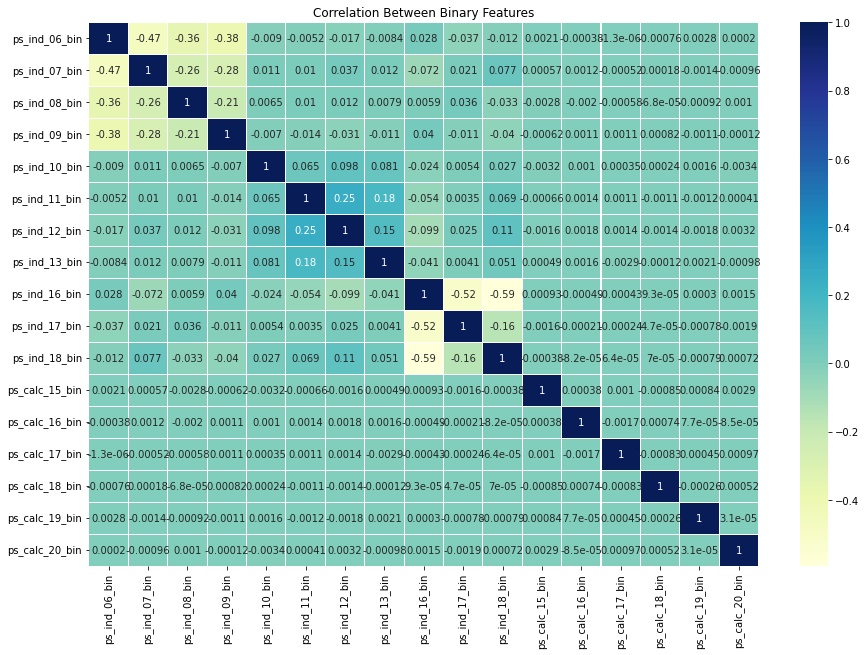

In [ ]:
# Correlation between Binary features
plt.figure(figsize=(15,10))
plt.title("Correlation Between Binary Features")
sns.heatmap(train_df[bin_features].corr(), cmap='YlGnBu', annot = True, linewidths=0.01)

The binary features do not have any noticeable correlation between them. 'ps_ind_18_bin' and 'ps_ind_16_bin' have the largest negative correlation but this is not of a great concern.

In [ ]:
# Missing values for binary features
missing_values(train_df[bin_features])

Missing Values in 'ps_ind_06_bin' : 0.0000 %
Missing Values in 'ps_ind_07_bin' : 0.0000 %
Missing Values in 'ps_ind_08_bin' : 0.0000 %
Missing Values in 'ps_ind_09_bin' : 0.0000 %
Missing Values in 'ps_ind_10_bin' : 0.0000 %
Missing Values in 'ps_ind_11_bin' : 0.0000 %
Missing Values in 'ps_ind_12_bin' : 0.0000 %
Missing Values in 'ps_ind_13_bin' : 0.0000 %
Missing Values in 'ps_ind_16_bin' : 0.0000 %
Missing Values in 'ps_ind_17_bin' : 0.0000 %
Missing Values in 'ps_ind_18_bin' : 0.0000 %
Missing Values in 'ps_calc_15_bin' : 0.0000 %
Missing Values in 'ps_calc_16_bin' : 0.0000 %
Missing Values in 'ps_calc_17_bin' : 0.0000 %
Missing Values in 'ps_calc_18_bin' : 0.0000 %
Missing Values in 'ps_calc_19_bin' : 0.0000 %
Missing Values in 'ps_calc_20_bin' : 0.0000 %


The binary features do not have any missing values

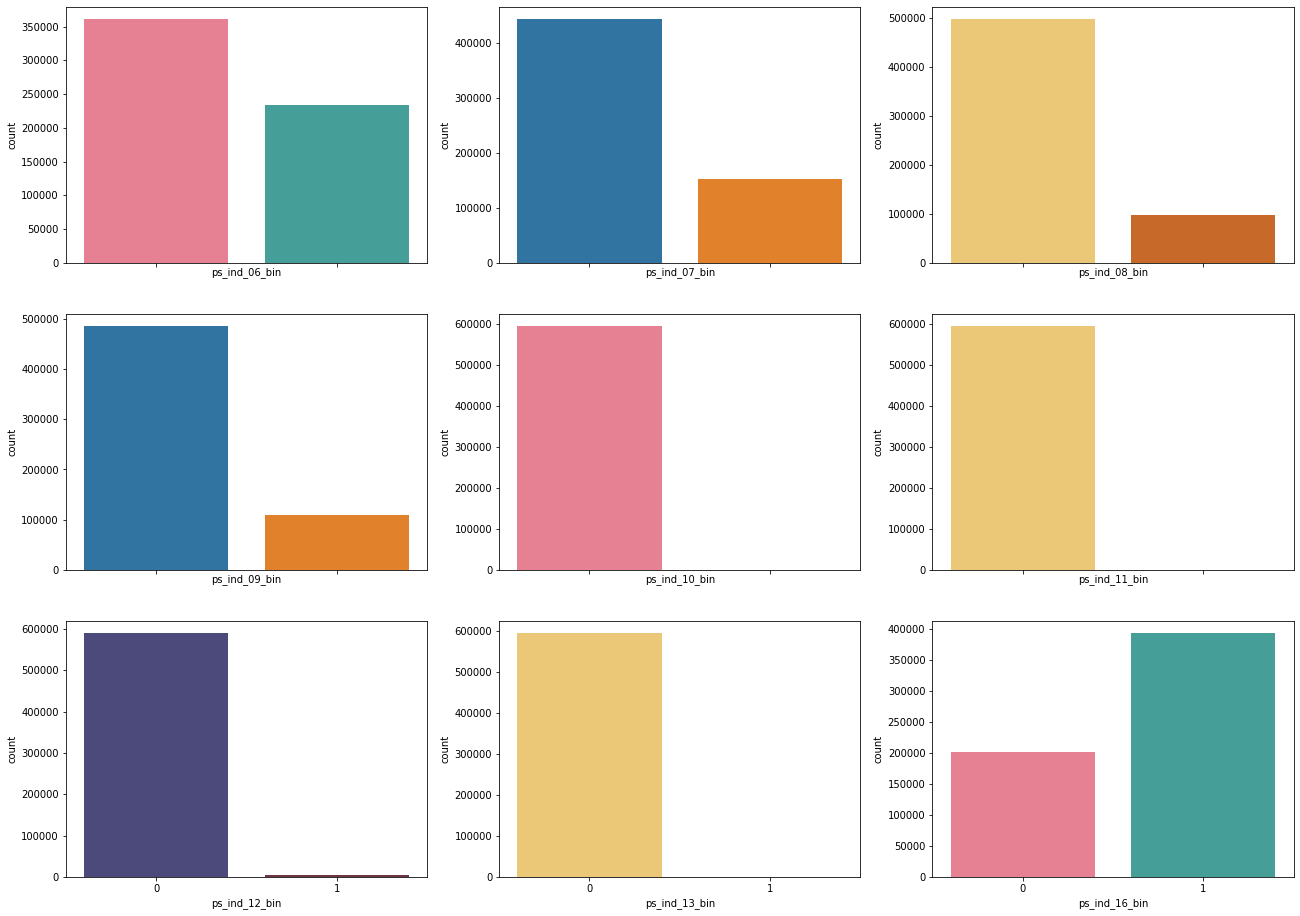

In [ ]:
# Seaborn countplots for Binary features
fig,ax = plt.subplots(3,3,figsize=(22,16),sharex='all')
ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9 = ax.flatten()
sns.countplot(train_df['ps_ind_06_bin'],palette='husl',ax=ax1)
sns.countplot(train_df['ps_ind_07_bin'],palette='tab10',ax=ax2)
sns.countplot(train_df['ps_ind_08_bin'],palette='YlOrBr',ax=ax3)
sns.countplot(train_df['ps_ind_09_bin'],palette='tab10',ax=ax4)
sns.countplot(train_df['ps_ind_10_bin'],palette='husl',ax=ax5)
sns.countplot(train_df['ps_ind_11_bin'],palette='YlOrBr',ax=ax6)
sns.countplot(train_df['ps_ind_12_bin'],palette='icefire',ax=ax7)
sns.countplot(train_df['ps_ind_13_bin'],palette='YlOrBr',ax=ax8)
sns.countplot(train_df['ps_ind_16_bin'],palette='husl',ax=ax9)

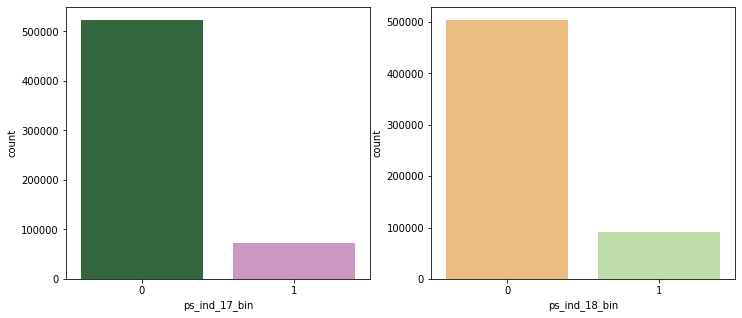

In [ ]:
# Seaborn countplots for Binary features
fig,ax = plt.subplots(1,2,figsize=(12,5))
ax1,ax2 = ax.flatten()

sns.countplot(train_df['ps_ind_17_bin'],palette='cubehelix',ax=ax1)
sns.countplot(train_df['ps_ind_18_bin'],palette='Spectral',ax=ax2)

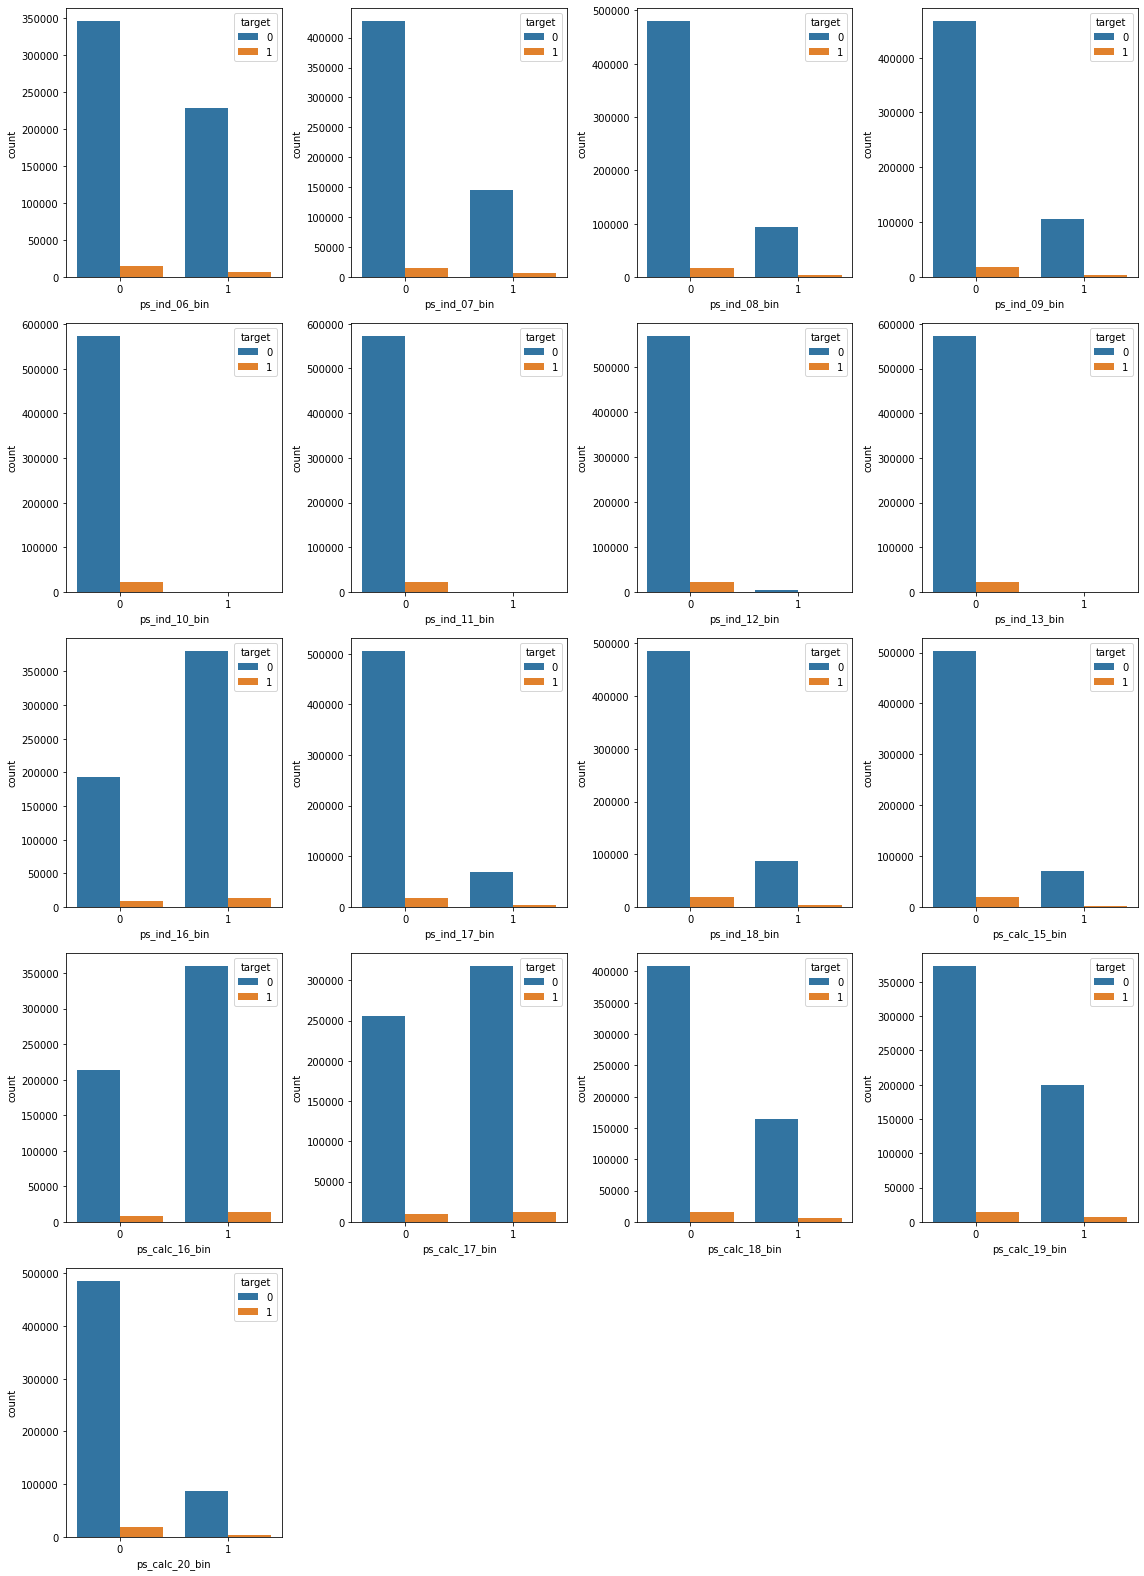

In [ ]:
# Using matplotlib and seaborn for plotting countplot of binary features

# Setting figure size
plt.figure(figsize=(16,22))
# Setting title of the figure
plt.title("Count Plots of Binary Features")

# Iterating to plot for all binary features

for i in range(len(bin_features)):
    plt.subplot(5,4,i+1)
    plt.ylabel('Count')
    sns.countplot(train_df[bin_features[i]], hue=y)
    plt.tight_layout()

1. Apart from a few calc features most of the binary features are dominated by a single value.

2. Some binary features like 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin' do not account for the positive class at all whereas for most of the calc features 0s and 1s account almost equally for both positive and negative class.

# Continuous Features

We can divide Continuous features into two parts calc and the rest of them. We can deal with both of them separately

In [ ]:
# Continous features
train_df[num_features_with_calc].describe()

,ps_ind_03,ps_calc_09,ps_calc_10,ps_ind_14,ps_car_14,ps_calc_05,ps_calc_01,ps_reg_02,ps_ind_01,ps_calc_12,ps_calc_04,ps_car_11,ps_calc_07,ps_car_12,ps_car_13,ps_ind_15,ps_calc_06,ps_car_15,ps_calc_08,ps_calc_03,ps_calc_13,ps_calc_02,ps_reg_01,ps_calc_14,ps_calc_11,ps_reg_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,4.423318,2.339034,8.433590,0.012451,0.276256,1.885886,0.449756,0.439184,1.900378,1.441918,2.372081,2.346072,3.005823,0.379945,0.813265,7.299922,7.689445,3.065899,9.225904,0.449849,2.872288,0.449589,0.610991,7.539026,5.441382,0.551102
std,2.699902,1.246949,2.904597,0.127545,0.357154,1.134927,0.287198,0.404264,1.983789,1.202963,1.117219,0.832548,1.414564,0.058327,0.224588,3.546042,1.334312,0.731366,1.459672,0.287153,1.694887,0.286893,0.287643,2.746652,2.332871,0.793506
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.250619,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,2.000000,1.000000,6.000000,0.000000,0.333167,1.000000,0.200000,0.200000,0.000000,1.000000,2.000000,2.000000,2.000000,0.316228,0.670867,5.000000,7.000000,2.828427,8.000000,0.200000,2.000000,0.200000,0.400000,6.000000,4.000000,0.525000
50%,4.000000,2.000000,8.000000,0.000000,0.368782,2.000000,0.500000,0.300000,1.000000,1.000000,2.000000,3.000000,3.000000,0.374166,0.765811,7.000000,8.000000,3.316625,9.000000,0.500000,3.000000,0.400000,0.700000,7.000000,5.000000,0.720677
75%,6.000000,3.000000,10.000000,0.000000,0.396485,3.000000,0.700000,0.600000,3.000000,2.000000,3.000000,3.000000,4.000000,0.400000,0.906190,10.000000,9.000000,3.605551,10.000000,0.700000,4.000000,0.700000,0.900000,9.000000,7.000000,1.000000
max,11.000000,7.000000,25.000000,4.000000,0.636396,6.000000,0.900000,1.800000,7.000000,10.000000,5.000000,3.000000,9.000000,1.264911,3.720626,13.000000,10.000000,3.741657,12.000000,0.900000,13.000000,0.900000,0.900000,23.000000,19.000000,4.037945


In [ ]:
# Missing values for numerical features without calc
missing_values(train_df[num_features_wo_calc])

Missing Values in 'ps_ind_03' : 0.0000 %
Missing Values in 'ps_car_15' : 0.0000 %
Missing Values in 'ps_reg_01' : 0.0000 %
Missing Values in 'ps_car_11' : 0.0008 %
Missing Values in 'ps_reg_02' : 0.0000 %
Missing Values in 'ps_car_12' : 0.0002 %
Missing Values in 'ps_car_13' : 0.0000 %
Missing Values in 'ps_ind_14' : 0.0000 %
Missing Values in 'ps_car_14' : 7.1605 %
Missing Values in 'ps_ind_15' : 0.0000 %
Missing Values in 'ps_reg_03' : 18.1065 %
Missing Values in 'ps_ind_01' : 0.0000 %


In [ ]:
# Missing values for calc numerical features
missing_values(train_df[calc_num_features])

Missing Values in 'ps_calc_04' : 0.0000 %
Missing Values in 'ps_calc_08' : 0.0000 %
Missing Values in 'ps_calc_01' : 0.0000 %
Missing Values in 'ps_calc_09' : 0.0000 %
Missing Values in 'ps_calc_07' : 0.0000 %
Missing Values in 'ps_calc_03' : 0.0000 %
Missing Values in 'ps_calc_13' : 0.0000 %
Missing Values in 'ps_calc_10' : 0.0000 %
Missing Values in 'ps_calc_02' : 0.0000 %
Missing Values in 'ps_calc_06' : 0.0000 %
Missing Values in 'ps_calc_14' : 0.0000 %
Missing Values in 'ps_calc_11' : 0.0000 %
Missing Values in 'ps_calc_05' : 0.0000 %
Missing Values in 'ps_calc_12' : 0.0000 %


# Distplots of continuous features excluding calc features

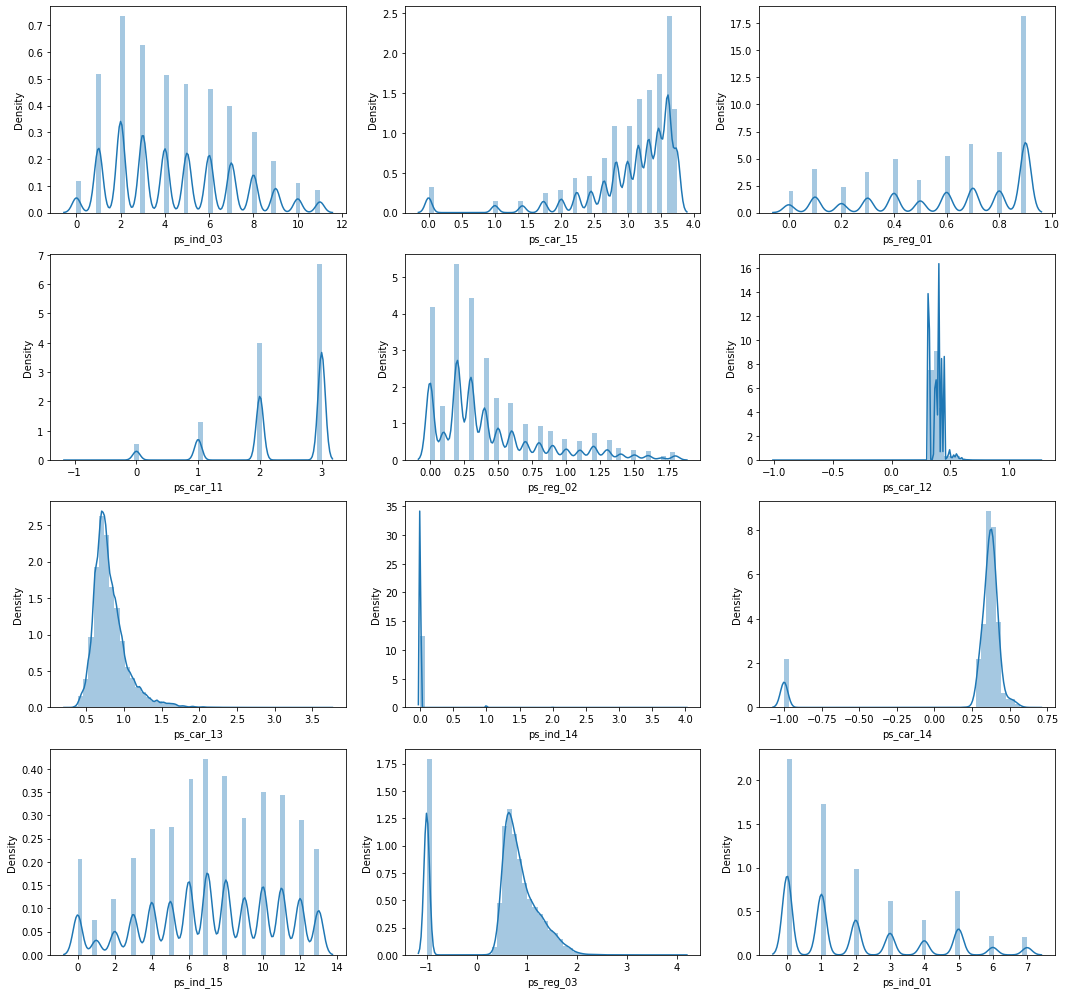

In [ ]:
# Seaborn distplot for numerical features without calc
plt.figure(figsize=(18,22))
for i in range(len(num_features_wo_calc)):
    plt.subplot(5,3,i+1)
    sns.distplot(train_df[num_features_wo_calc[i]])

Features like 'ps_reg_01', 'ps_car_11' and 'ps_ind_14' is dominated by a single value.

Most of the features like 'ps_reg_01', 'ps_car_11' etc contains few unique values.

# Boxplots of continuous features excluding calc features

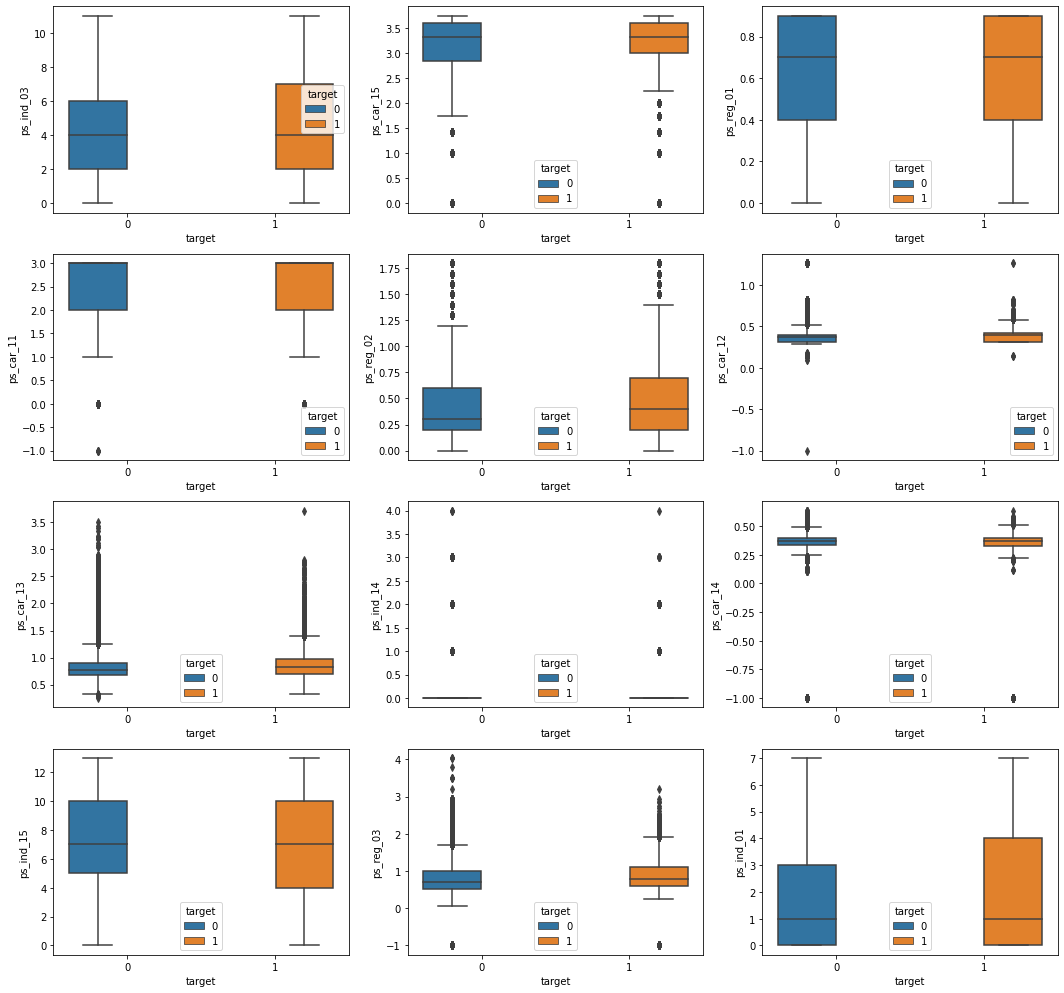

In [ ]:
# Boxplots for numerical features without calc
plt.figure(figsize=(18,22))
for i in range(len(num_features_wo_calc)):
    plt.subplot(5,3,i+1)
    sns.boxplot(y, train_df[num_features_wo_calc[i]], hue=y)

The boxplots shows the separabilty of each feature with the class labels. 

Although the features does not seem to exhibit high varying patterns for the two classes, there are small differences in skewness and mean that could help in separating both classes.

For example features like 'ps_ind_01', 'ps_reg_02', 'ps_ind_03','ps_car_13' all have different skews and distribution of data for both classes. 

These features could prove valuable in determining the final result.
'ps_reg_02' in particular has a noticeable difference in mean and distribution for both classes.

# Distplots of calc features

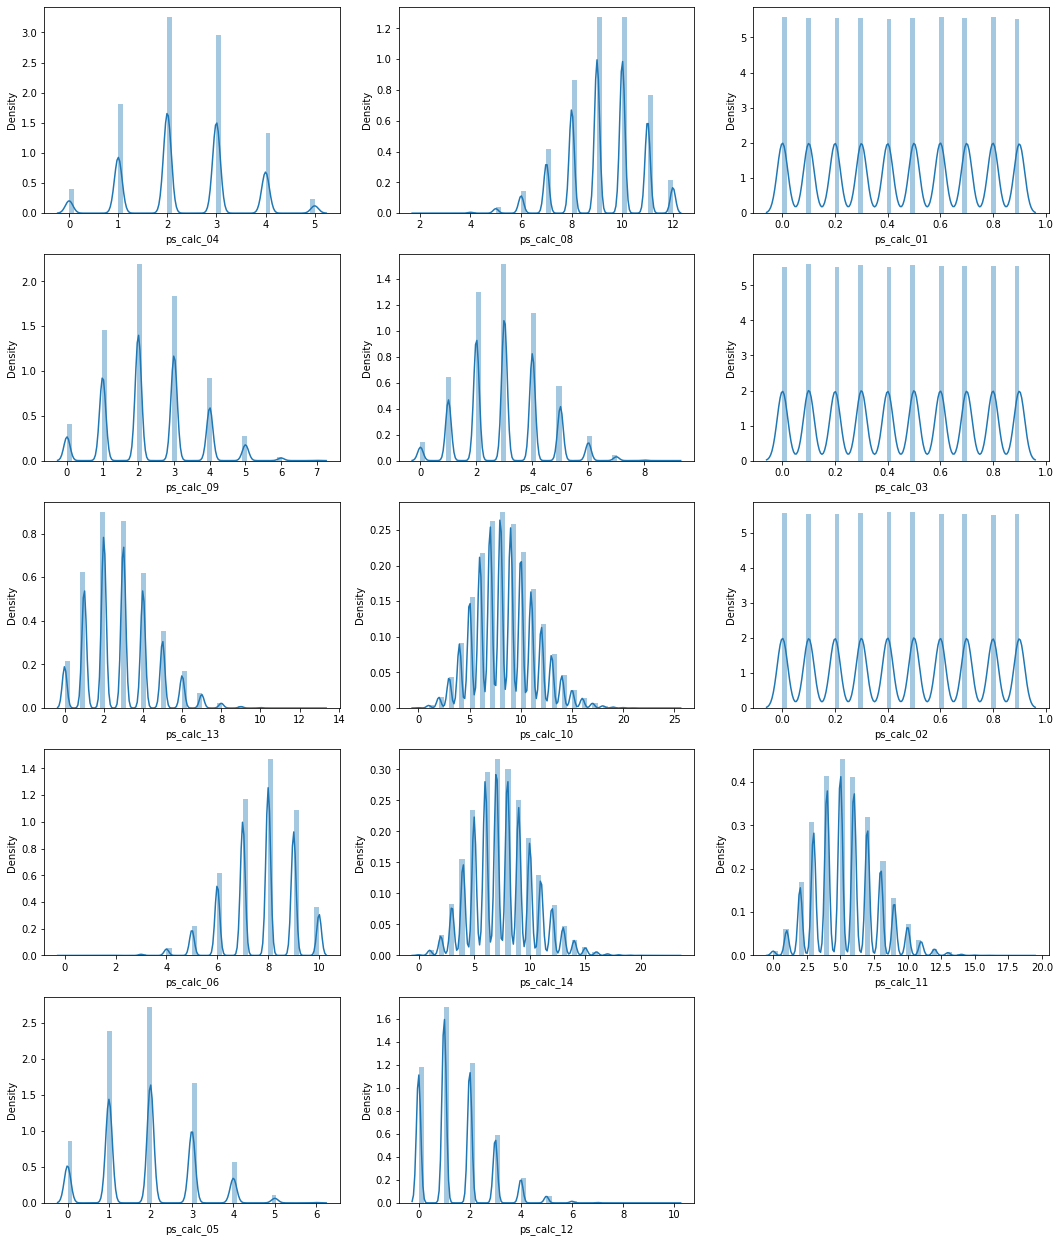

In [ ]:
# Distplots of calc features
plt.figure(figsize=(18,22))
for i in range(len(calc_num_features)):
    plt.subplot(5,3,i+1)
    sns.distplot(train[calc_num_features[i]])

Features 'ps_calc_03','ps_calc_01', 'ps_calc_02' are uniformly distributed.

Some other features like 'ps_calc_07', 'ps_calc_14', 'ps_calc_11', 'ps_calc_10' seems to be gaussian distributed

# Boxplots of calculated continuous features

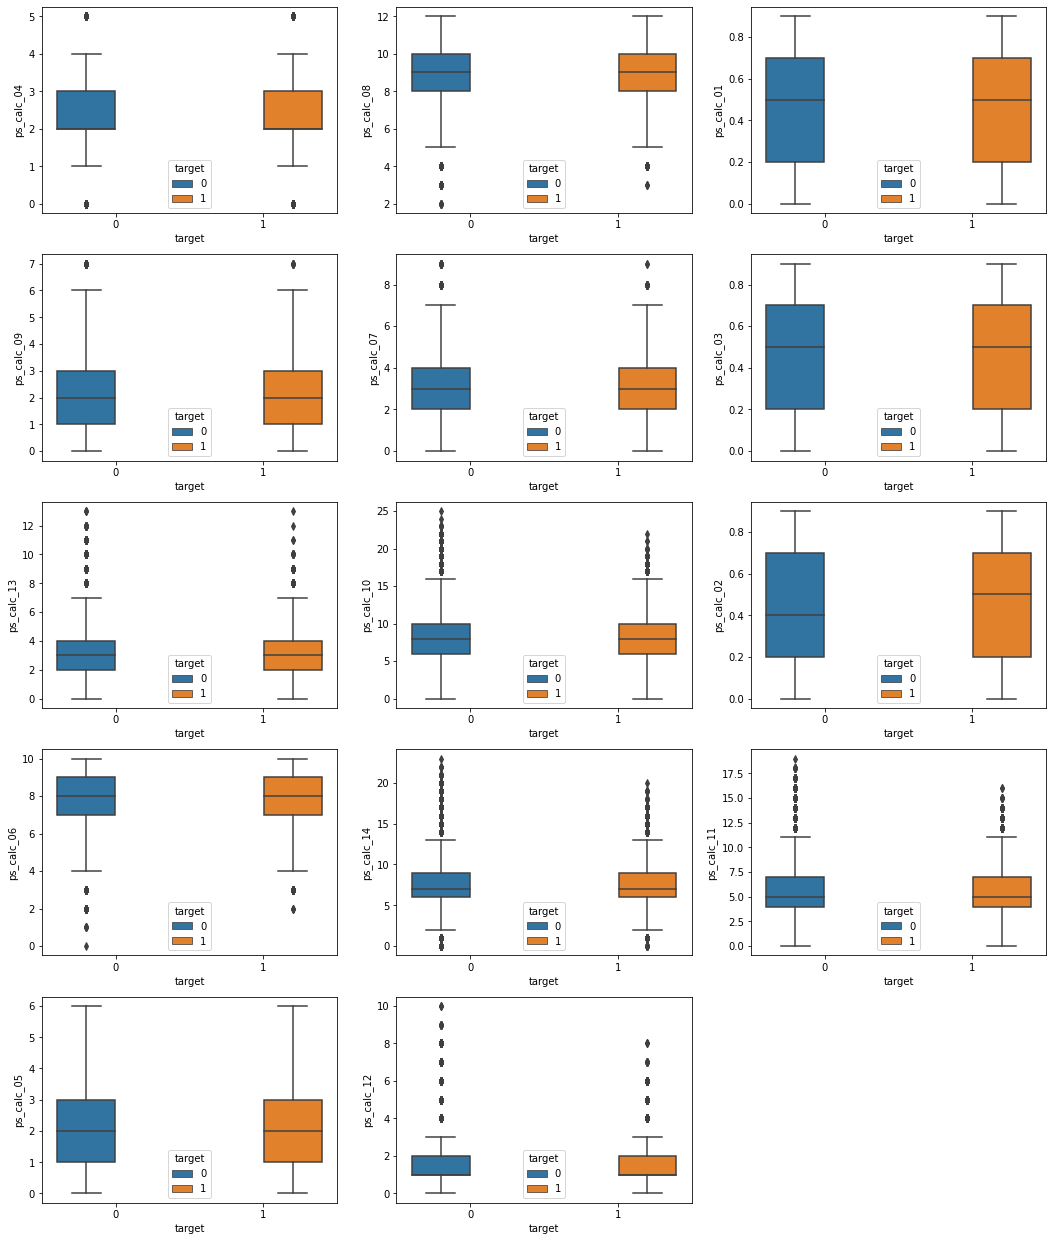

In [ ]:
# Boxplots of calculated continuous features
plt.figure(figsize=(18,22))
for i in range(len(calc_num_features)):
    plt.subplot(5,3,i+1)
    sns.boxplot(y, train_df[calc_num_features[i]], hue=y)

1. Apart from 'ps_calc_02' there is no difference between the two class distributions in any of the calc features. There is no valuable info provided by any of the calc features.

2. These features do not prove to give any information towards the prediction.

# Preparing the data

In [ ]:
# Function to fill in the missing values of categorical features

def filling_missing_values(data):
  for i in tqdm(data.columns.values):
    if data[data[i] == -1].shape[0] > 0:
      if i == 'ps_car_03_cat' or i == 'ps_car_05_cat':
        continue
      # Applying mode for ps_ind_05_cat and ps_car_07_cat features
      elif i == 'ps_ind_05_cat' or i == 'ps_car_07_cat':
        lst = data[i].apply(lambda x:data[i].mode() if x == -1 else x)
        data[i] = pd.Series(lst)
      else:
      # Applying mean for ps_ind_02_cat, ps_ind_04_cat, ps_car_01_cat, ps_car_02_cat, ps_car_09_cat features  
        lst = data[i].apply(lambda x:data[i].mean() if x == -1 else x)
        data[i] = pd.Series(lst)
    else:
      continue
  return data

In [ ]:
train_without_missing_values = train
test_without_missing_values = test_df

print("Train without missing values --> Shape :", train_without_missing_values.shape)
print("Test without missing values --> Shape :", test_without_missing_values.shape)

Train without missing values --> Shape : (595212, 57)
Test without missing values --> Shape : (892816, 57)


In [ ]:
# Adding an extra feature "missing" to the dataset which consists of all the missing values in a row.
train_without_missing_values['missing'] = (train == -1).sum(axis=1)
test_without_missing_values['missing'] = (test_df == -1).sum(axis=1)

In [ ]:
print("Shape of New Train --> without any missing values and with 'missing' column :", train_without_missing_values.shape)
print("Shape of New Test --> without any missing values and with 'missing' column :", test_without_missing_values.shape)

Shape of New Train --> without any missing values and with 'missing' column : (595212, 58)
Shape of New Test --> without any missing values and with 'missing' column : (892816, 58)


In [ ]:
# Dropping All calc features as they are just random noise
train_without_missing_values.drop(calc_features, axis=1, inplace=True)
test_without_missing_values.drop(calc_features, axis=1, inplace=True)

In [ ]:
print("Train Data ready for modelling --> Shape :", train_without_missing_values.shape)
print("Test Data ready for modelling --> Shape :", test_without_missing_values.shape)

Train Data ready for modelling --> Shape : (595212, 38)
Test Data ready for modelling --> Shape : (892816, 38)


In [ ]:
# Checking the columns of the train data
train_without_missing_values.columns

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'missing'],
      dtype='object')

In [ ]:
# Checking the columns of test data
test_without_missing_values.columns

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'missing'],
      dtype='object')

# Preparing Model

In [ ]:
# Function for one-hot-encoding categorical features
def one_hot_encoding(train, test, cat_features):
    temp = pd.concat([train, test])
    temp = pd.get_dummies(temp, columns = cat_features)
    train = temp.iloc[:train.shape[0],:]
    test = temp.iloc[train.shape[0]:, :]
    return train, test

In [ ]:
# For Actual submission
train_ohe, test_ohe = one_hot_encoding(train_without_missing_values, test_without_missing_values, cat_features)

In [ ]:
# splitting the train dataset for cross validation and one_hot_encoding categorical features
X_train, X_cv, y_train, y_cv = train_test_split(train_without_missing_values, y, test_size = 0.2, stratify = y, random_state = 2019)
X_train, X_cv = one_hot_encoding(X_train, X_cv, cat_features) 

In [ ]:
for i in X_train.columns:
  print(i)

ps_ind_01
ps_ind_03
ps_ind_06_bin
ps_ind_07_bin
ps_ind_08_bin
ps_ind_09_bin
ps_ind_10_bin
ps_ind_11_bin
ps_ind_12_bin
ps_ind_13_bin
ps_ind_14
ps_ind_15
ps_ind_16_bin
ps_ind_17_bin
ps_ind_18_bin
ps_reg_01
ps_reg_02
ps_reg_03
ps_car_11
ps_car_12
ps_car_13
ps_car_14
ps_car_15
missing
ps_ind_02_cat_-1
ps_ind_02_cat_1
ps_ind_02_cat_2
ps_ind_02_cat_3
ps_ind_02_cat_4
ps_ind_04_cat_-1
ps_ind_04_cat_0
ps_ind_04_cat_1
ps_ind_05_cat_-1
ps_ind_05_cat_0
ps_ind_05_cat_1
ps_ind_05_cat_2
ps_ind_05_cat_3
ps_ind_05_cat_4
ps_ind_05_cat_5
ps_ind_05_cat_6
ps_car_01_cat_-1
ps_car_01_cat_0
ps_car_01_cat_1
ps_car_01_cat_2
ps_car_01_cat_3
ps_car_01_cat_4
ps_car_01_cat_5
ps_car_01_cat_6
ps_car_01_cat_7
ps_car_01_cat_8
ps_car_01_cat_9
ps_car_01_cat_10
ps_car_01_cat_11
ps_car_02_cat_-1
ps_car_02_cat_0
ps_car_02_cat_1
ps_car_03_cat_-1
ps_car_03_cat_0
ps_car_03_cat_1
ps_car_04_cat_0
ps_car_04_cat_1
ps_car_04_cat_2
ps_car_04_cat_3
ps_car_04_cat_4
ps_car_04_cat_5
ps_car_04_cat_6
ps_car_04_cat_7
ps_car_04_cat_8
ps_car

In [ ]:
# Using skLearn StandardScalar to scale the values
scaler = StandardScaler()
scaler.fit(X_train[num_features_wo_calc])

X_train[num_features_wo_calc] = scaler.transform(X_train[num_features_wo_calc])
X_cv[num_features_wo_calc] = scaler.transform(X_cv[num_features_wo_calc])

In [ ]:
# Checking the shape of train and cross validation data
print("X_train Shape : ", X_train.shape)
print("X_cv Shape : ", X_cv.shape)

X_train Shape :  (476169, 208)
X_cv Shape :  (119043, 208)


# Logistic Regression

In [ ]:
# Trying with various values of alpha
alpha_values = [0.0001,0.001,0.01,0.002,0.02,0.03]
loss_values = ['log']
auc_lr1 = {}
gini_lr1 = {}
for alpha_value in alpha_values:
  for loss_value in loss_values:
    lr = SGDClassifier(loss=loss_value, alpha=alpha_value, n_jobs=-1)
    lr.fit(X_train, y_train)
    
    auc_lr1[alpha_value] = roc_auc_score(y_cv, lr.predict_proba(X_cv)[:,1])
    gini_lr1[alpha_value] = gini_normalized(y_cv, lr.predict_proba(X_cv)[:,1])
    print("Alpha Value :", alpha_value)
    print("Loss Value :", loss_value)

Alpha Value : 0.0001
Loss Value : log
Alpha Value : 0.001
Loss Value : log
Alpha Value : 0.01
Loss Value : log
Alpha Value : 0.002
Loss Value : log
Alpha Value : 0.02
Loss Value : log
Alpha Value : 0.03
Loss Value : log


In [ ]:
h = max(gini_lr1, key=auc_lr1.get)
print('Best Gini using Logistic Regression:', gini_lr1[h])
print('Best AUC using Logistic Regression:', auc_lr1[h])
print('Best Alpha Parameter using Logistic Regression:', h)

Best Gini using Logistic Regression: 0.26500955626628697
Best AUC using Logistic Regression: 0.6325047781331437
Best Alpha Parameter using Logistic Regression: 0.001


In [ ]:
auc_lr2 = {}
gini_lr2 = {}
# Trying with various values of alpha
alpha_values = [0.0001,0.001,0.01,0.02,0.002,0.03]
for alpha_value in alpha_values:
    lr = SGDClassifier(loss='log', alpha=alpha_value, penalty = 'l1', n_jobs=-1)
    lr.fit(X_train, y_train)
    
    auc_lr2[alpha_value] = roc_auc_score(y_cv, lr.predict_proba(X_cv)[:,1])
    gini_lr2[alpha_value] = gini_normalized(y_cv, lr.predict_proba(X_cv)[:,1])
    print("Alpha Value :", alpha_value)

Alpha Value : 0.0001
Alpha Value : 0.001
Alpha Value : 0.01
Alpha Value : 0.02
Alpha Value : 0.002
Alpha Value : 0.03


In [ ]:
h = max(gini_lr2, key=auc_lr2.get)
print('Best Gini using Logistic Regression with penalty:', gini_lr2[h])
print('Best AUC using Logistic Regression with penalty:', auc_lr2[h])
print('Best Alpha Parameter using Logistic Regression with penalty:', h)

Best Gini using Logistic Regression with penalty: 0.2588017324212648
Best AUC using Logistic Regression with penalty: 0.6294008662106324
Best Alpha Parameter using Logistic Regression with penalty: 0.0001


Logistic Regression is not producing a good result for this problem statement

# SVM

In [ ]:
# Trying with various values of alpha
alpha_values = [0.0001,0.001,0.01,0.02,0.002,0.03]
auc_svm1 = {}
gini_svm1 = {}
for alpha_value in alpha_values:
    svm = SGDClassifier(alpha=alpha_value, n_jobs=-1)
    calib = CalibratedClassifierCV(svm, cv=3)
    calib.fit(X_train, y_train)
    
    auc_svm1[alpha_value] = roc_auc_score(y_cv, calib.predict_proba(X_cv)[:,1])
    gini_svm1[alpha_value] = gini_normalized(y_cv, calib.predict_proba(X_cv)[:,1])
    print("Alpha Value :", alpha_value)

Alpha Value : 0.0001
Alpha Value : 0.001
Alpha Value : 0.01
Alpha Value : 0.02
Alpha Value : 0.002
Alpha Value : 0.03


In [ ]:
h = max(gini_svm1, key=auc_svm1.get)
print('Best Gini using SVM:', gini_svm1[h])
print('Best AUC using SVM:', auc_svm1[h])
print('Best Alpha Parameter using SVM:', h)

Best Gini using SVM: 0.1509252782660588
Best AUC using SVM: 0.5754626391330294
Best Alpha Parameter using SVM: 0.001


# RandomForest

In [ ]:
# Trying various values of n_estimators
n_est = [1000,1200,1300,1400]
# Trying various values of min_samples_leaf
min_samples_leaf = [1000,1100,1200,1300]
auc_rf1 = {}
gini_rf1 = {}
for i in n_est:
    for j in min_samples_leaf:
        # Using RandomForestClassifer
        rf = RandomForestClassifier(n_estimators=i, min_samples_leaf=j, n_jobs=-1)
        rf.fit(X_train, y_train)
        
        auc_rf1[(i,j)] = roc_auc_score(y_cv, rf.predict_proba(X_cv)[:,1])
        gini_rf1[(i,j)] = gini_normalized(y_cv, rf.predict_proba(X_cv)[:,1])
        print(i,j)

1000 1000
1000 1100
1000 1200
1000 1300
1200 1000
1200 1100
1200 1200
1200 1300
1300 1000
1300 1100
1300 1200
1300 1300
1400 1000
1400 1100
1400 1200
1400 1300


In [ ]:
h = max(gini_rf1, key=auc_rf1.get)
print('Best Gini using RandomForest:', gini_rf1[h])
print('Best AUC using RandomForest:', auc_rf1[h])
print('Best Parameters using RandomForest:', h)

Best Gini using RandomForest: 0.2659823096556255
Best AUC using RandomForest: 0.6329911548278129
Best Parameters using RandomForest: (1200, 1000)


In [ ]:
# Trying various values of max_leaf_nodes
max_leaf_nodes = [90,100,120,130,140,150]
auc_rf2 = {}
gini_rf2 = {}
for i in max_leaf_nodes:
    # Using RandomForestClassifer keeping n_estimators and min_samples_leaf fixed
    rf = RandomForestClassifier(n_estimators=1000, min_samples_leaf=1000, max_leaf_nodes=i, n_jobs=-1)
    rf.fit(X_train, y_train)

    auc_rf2[(i,j)] = roc_auc_score(y_cv, rf.predict_proba(X_cv)[:,1])
    gini_rf2[(i,j)] = gini_normalized(y_cv, rf.predict_proba(X_cv)[:,1])

In [ ]:
h = max(gini_rf2, key=auc_rf2.get)
print('Best Gini using RandomForest :', gini_rf2[h])
print('Best AUC using RandomForest :', auc_rf2[h])
print('Best Parameters using RandomForest :', h)

Best Gini using RandomForest : 0.2658313032241613
Best AUC using RandomForest : 0.6329156516120806
Best Parameters using RandomForest : (150, 1300)


# XGBoost

In [ ]:
n_estimators1 = [700,900,1200,1300]
learning_rate = [0.01,0.1,0.3]
auc_xgb1 = {}
gini_xgb1 = {}
for i in n_estimators1:
    for j in learning_rate:
        xgb_model = xgb.XGBClassifier(n_estimators = i, learning_rate=j, n_jobs=-1)
        xgb_model.fit(X_train, y_train)
        
        auc_xgb1[(i,j)] = roc_auc_score(y_cv, xgb_model.predict_proba(X_cv)[:,1])
        gini_xgb1[(i,j)] = gini_normalized(y_cv, xgb_model.predict_proba(X_cv)[:,1])

In [ ]:
h = max(gini_xgb1, key=auc_xgb1.get)
print('Best Gini using XGBoost :', gini_xgb1[h])
print('Best AUC using XGBoost :', auc_xgb1[h])
print('Best Parameters using XGBoost :',h)

In [ ]:
max_depth = [3,5,7,9]
subsample = [0.70,0.8,0.9]
auc_xgb2 = {}
gini_xgb2 = {}
for i in max_depth:
    for j in subsample:
        xgb_model = xgb.XGBClassifier(n_estimators = 1300, learning_rate=0.01, subsample= j, max_depth=i, n_jobs=-1)
        xgb_model.fit(X_train, y_train)
        
        auc_xgb2[(1300,0.01,i,j)] = roc_auc_score(y_cv, xgb_model.predict_proba(X_cv)[:,1])
        gini_xgb2[(1300,0.01,i,j)] = gini_normalized(y_cv, xgb_model.predict_proba(X_cv)[:,1])

In [ ]:
h = max(gini_xgb2, key=auc_xgb2.get)
print('Best Gini using XGBoost :', gini_xgb2[h])
print('Best AUC using XGBoost :', auc_xgb2[h])
print('Best Parameters using XGBoost :', h)

In [ ]:
auc_xgb3 = {}
gini_xgb3 = {}
n_estimators2 = [1250,1300,1350,1400,1450,1500]
for j in n_estimators2:
    xgb_model = xgb.XGBClassifier(n_estimators = j, learning_rate=0.01, subsample= 0.8, max_depth=5, n_jobs=-1)
    xgb_model.fit(X_train, y_train)

    auc_xgb3[(j,0.01,5,0.8)] = roc_auc_score(y_cv, xgb_model.predict_proba(X_cv)[:,1])
    gini_xgb3[(j,0.01,5,0.8)] = gini_normalized(y_cv, xgb_model.predict_proba(X_cv)[:,1])

In [ ]:
h = max(gini_xgb3, key=auc_xgb3.get)
print('Best Gini using XGBoost :', gini_xgb3[h])
print('Best AUC using XGBoost :', auc_xgb3[h])
print('Best Parameters using XGBoost :', h)

In [ ]:
auc_xgb4 = {}
gini_xgb4 = {}
lambda_l1 = [0.8,0.9,1]
for j in lambda_l1:
    xgb_model = xgb.XGBClassifier(n_estimators = 1400, learning_rate=0.01, subsample= 0.8, max_depth=5, n_jobs=-1, reg_alpha=j)
    xgb_model.fit(X_train, y_train)

    auc_xgb4[(1400,0.01,5,0.8,j)] = roc_auc_score(y_cv, xgb_model.predict_proba(X_cv)[:,1])
    gini_xgb4[(1400,0.01,5,0.8,j)] = gini_normalized(y_cv, xgb_model.predict_proba(X_cv)[:,1])

In [ ]:
h = max(gini_xgb4, key=auc_xgb4.get)
print('Best Gini using XGBoost :', gini_xgb4[h])
print('Best AUC using XGBoost :', auc_xgb4[h])
print('Best Parameters using XGBoost :', h)

In [ ]:
auc_xgb5 = {}
gini_xgb5 = {}
min_child_weight = [98,99,100,101]
for j in min_child_weight:
    xgb_model = xgb.XGBClassifier(n_estimators = 1400, learning_rate=0.01, subsample= 0.8, max_depth=5, n_jobs=-1, reg_alpha=1,
                                 min_child_weight=j)
    xgb_model.fit(X_train, y_train)

    auc_xgb5[(1400,0.01,5,0.8,1,j)] = roc_auc_score(y_cv, xgb_model.predict_proba(X_cv)[:,1])
    gini_xgb5[(1400,0.01,5,0.8,1,j)] = gini_normalized(y_cv, xgb_model.predict_proba(X_cv)[:,1])

In [ ]:
h = max(gini_xgb5, key=auc_xgb5.get)
print('Best Gini using XGBoost :', gini_xgb5[h])
print('Best AUC using XGBoost :', auc_xgb5[h])
print('Best Parameters using XGBoost :', h)

In [ ]:
# Final parameters of the model

xgb_params = {}
xgb_params['n_estimators'] = 1600
xgb_params['learning_rate'] = 0.01
xgb_params['max_depth'] = 5
xgb_params['feature_fraction'] = 1
xgb_params['min_child_weight'] = 100
xgb_params['reg_alpha'] = 1
xgb_params['subsample'] = 0.8

In [ ]:
xgb_model = xgb.XGBClassifier(**xgb_params)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict_proba(X_cv)[:,1]

In [ ]:
roc_auc_score(y_cv, xgb_pred), gini_normalized(y_cv, xgb_pred)  

(0.6458771786308435, 0.29175437936332566)

In [ ]:
xgb_model.fit(train_ohe,y)
xgb_test_pred = xgb_model.predict_proba(test_ohe)[:,1] 

# LightGBM

In [ ]:
auc_lgb1 = {}
gini_lgb1 = {}
n_estimators = [1200,1300,1400]
learning_rate = [0.01,0.03,0.1]
for i in n_estimators:
    for j in learning_rate:
        lgb_model = LGBMClassifier(n_estimators=i, learning_rate=j, n_jobs=-1, reg_alpha=1, reg_lambda=1)
        lgb_model.fit(X_train.values, y_train)
        
        auc_lgb1[(i,j)] = roc_auc_score(y_cv, lgb_model.predict_proba(X_cv.values)[:,1])
        gini_lgb1[(i,j)] = gini_normalized(y_cv, lgb_model.predict_proba(X_cv.values)[:,1])

In [ ]:
h = max(gini_lgb1, key=auc_lgb1.get)
print('Best Gini using LightGBM :', gini_lgb1[h])
print('Best AUC using LightGBM :', auc_lgb1[h])
print('Best Parameters using LightGBM :', h)

In [ ]:
auc_lgb2 = {}
gini_lgb2 = {}
num_leaves = [29,30,31,32]
bagging_fraction = [0.7,0.8,0.9,1]
for i in num_leaves:
    for j in bagging_fraction:
        lgb_model = LGBMClassifier(n_estimators=1200, learning_rate=0.01, n_jobs=-1, reg_alpha=1, reg_lambda=1, num_leaves=i,
                                  baggin_fraction = j, bagging_freq=1)
        lgb_model.fit(X_train.values, y_train)
        
        auc_lgb2[(i,j)] = roc_auc_score(y_cv, lgb_model.predict_proba(X_cv.values)[:,1])
        gini_lgb2[(i,j)] = gini_normalized(y_cv, lgb_model.predict_proba(X_cv.values)[:,1])

In [ ]:
h = max(gini_lgb2, key=auc_lgb2.get)
print('Best Gini using LightGBM :', gini_lgb2[h])
print('Best AUC using LightGBM :', auc_lgb2[h])
print('Best Parameters using LightGBM :', h)

In [ ]:
auc_lgb3 = {}
gini_lgb3 = {}
n_estimators = [1200,1300,1400]
min_data_in_leaf = [1100,1300,1500,1700]
for i in n_estimators:
    for j in min_data_in_leaf:
        lgb_model = LGBMClassifier(n_estimators=i, learning_rate=0.01, n_jobs=-1, reg_alpha=1, reg_lambda=1, num_leaves=29,
                                  baggin_fraction = 0.7, bagging_freq=1, min_data_in_leaf=j)
        lgb_model.fit(X_train.values, y_train)
        
        auc_lgb3[(i,j)] = roc_auc_score(y_cv, lgb_model.predict_proba(X_cv.values)[:,1])
        gini_lgb3[(i,j)] = gini_normalized(y_cv, lgb_model.predict_proba(X_cv.values)[:,1])

In [ ]:
h = max(gini_lgb3, key=auc_lgb3.get)
print('Best Gini using LightGBM :', gini_lgb3[h])
print('Best AUC using LightGBM :', auc_lgb3[h])
print('Best Parameters using LightGBM :', h)

In [ ]:
auc_lgb4 = {}
gini_lgb4 = {}
n_estimators = [1200,1300,1400]
feature_fraction = [0.7,0.8,0.9,1]
for i in n_estimators:
    for j in feature_fraction:
        lgb_model = LGBMClassifier(n_estimators=i, learning_rate=0.01, n_jobs=-1, reg_alpha=1, reg_lambda=1, num_leaves=29,
                                  baggin_fraction = 0.7, bagging_freq=1, min_data_in_leaf=1700, feature_fraction=j)
        lgb_model.fit(X_train.values, y_train)
        
        auc_lgb4[(i,j)] = roc_auc_score(y_cv, lgb_model.predict_proba(X_cv.values)[:,1])
        gini_lgb4[(i,j)] = gini_normalized(y_cv, lgb_model.predict_proba(X_cv.values)[:,1])

In [ ]:
h = max(gini_lgb4, key=auc_lgb4.get)
print('Best Gini using LightGBM :', gini_lgb4[h])
print('Best AUC using LightGBM :', auc_lgb4[h])
print('Best Parameters using LightGBM :', h)

In [ ]:
auc_lgb5 = {}
gini_lgb5 = {}
num_leaves = [25,30,35,40]
min_data_in_leaf = [1200,1300,1400]
for i in min_data_in_leaf:
    for j in num_leaves:
        lgb_model = LGBMClassifier(n_estimators=1300, learning_rate=0.01, n_jobs=-1, reg_alpha=1, reg_lambda=1, num_leaves=j,
                                  baggin_fraction = 0.8, bagging_freq=1, min_data_in_leaf=i, feature_fraction=0.8)
        lgb_model.fit(X_train.values, y_train)
        
        auc_lgb5[(i,j)] = roc_auc_score(y_cv, lgb_model.predict_proba(X_cv.values)[:,1])
        gini_lgb5[(i,j)] = gini_normalized(y_cv, lgb_model.predict_proba(X_cv.values)[:,1])

In [ ]:
h = max(gini_lgb5, key=auc_lgb5.get)
print('Best Gini using LightGBM :', gini_lgb5[h])
print('Best AUC using LightGBM :', auc_lgb5[h])
print('Best Parameters using LightGBM :', h)

In [ ]:
auc_lgb6 = {}
gini_lgb6 = {}
min_data_in_leaf= [1300,1500,1700]
num_leaves = [28,29,30,31]
for i in min_data_in_leaf:
    for j in num_leaves:
        lgb_model = LGBMClassifier(n_estimators=1300, learning_rate=0.01, n_jobs=-1, lambda_l2=1, lambda_l1=1, num_leaves=j,
                                  baggin_fraction = 0.8, bagging_freq=1, min_data_in_leaf=i, feature_fraction=0.8)
        lgb_model.fit(X_train.values, y_train)
        
        auc_lgb6[(i,j)] = roc_auc_score(y_cv, lgb_model.predict_proba(X_cv.values)[:,1])
        gini_lgb6[(i,j)] = gini_normalized(y_cv, lgb_model.predict_proba(X_cv.values)[:,1])

In [ ]:
h = max(gini_lgb6, key=auc_lgb6.get)
print('Best Gini using LightGBM :', gini_lgb6[h])
print('Best AUC using LightGBM :', auc_lgb6[h])
print('Best Parameters using LightGBM :', h)

In [ ]:
# Final Parameters of the model
lgb_params = {}
lgb_params['n_estimators'] = 1300
lgb_params['learning_rate'] = 0.01
lgb_params['num_leaves'] = 30
lgb_params['feature_fraction'] = 0.8
lgb_params['min_data_in_leaf'] = 1400
lgb_params['lambda_l1'] = 1
lgb_params['lambda_l2'] = 1
lgb_params['bagging_freq'] = 1
lgb_params['bagging_fraction'] = 0.8

In [ ]:
lgb_model = LGBMClassifier(**lgb_params)
lgb_model.fit(X_train.values, y_train.values)
lgb_pred = lgb_model.predict_proba(X_cv)[:,1]

In [ ]:
roc_auc_score(y_cv, lgb_pred), gini_normalized(y_cv, lgb_pred) 

(0.6455713773461451, 0.29114275469229045)

In [ ]:
lgb_model.fit(train_ohe.values,y.values)
lgb_test_pred = lgb_model.predict_proba(test_ohe.values)[:,1]

# Feature Selection

In [ ]:
features = train_ohe.columns.values

In [ ]:
def feature_selection(fi, features, threshold, graph=True):
    # Function for feature selection.
    idx_fi_desc = np.argsort(fi)[::-1]
    features_desc = [features[i] for i in idx_fi_desc]
    fi_desc = fi[idx_fi_desc]
    # Features that are having importance, greater than the threshold are selected
    selected_features = [features_desc[i] for i in range(len(fi_desc)) if fi_desc[i] > threshold]
    selected_fi = [fi_desc[i] for i in range(len(fi_desc)) if fi_desc[i] > threshold]
    
    # Plotting the graph
    if graph:
        plt.figure(figsize=(10,30))
        plt.title("Feature Importance")
        plt.barh(features_desc[:len(selected_features)], fi_desc[:len(selected_features)], color='Red')
    
    # returning the selected features
    return selected_features

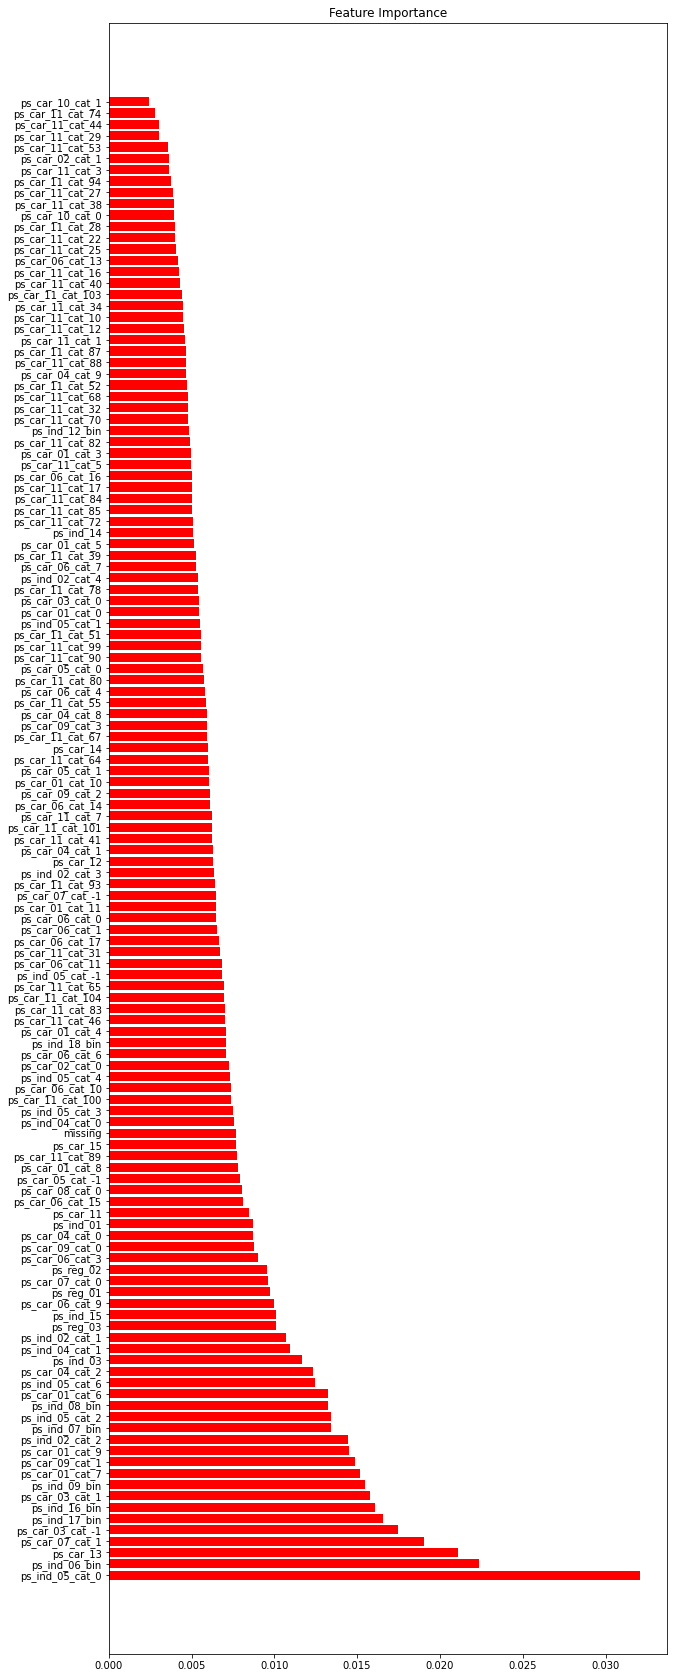

In [ ]:
selected_features_xgb = feature_selection(xgb_model.feature_importances_, features, 0)

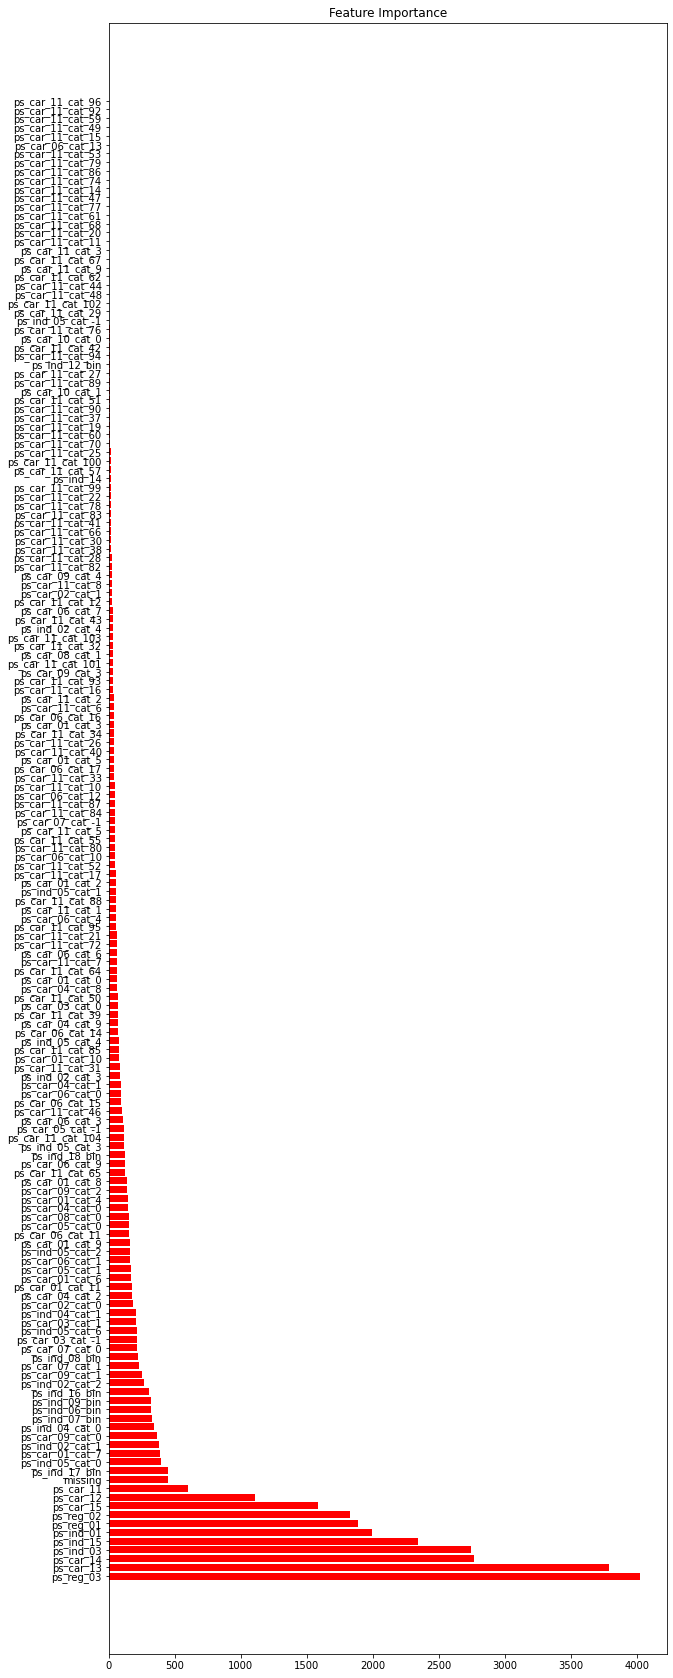

In [ ]:
selected_features_lgb = feature_selection(lgb_model.feature_importances_, features, 0)

In [ ]:
print("Total number of features selected by LightGBM :",len(selected_features_lgb)) 
print("Total number of features selected by XGBoost :",len(selected_features_xgb))

Total number of features selected by LightGBM : 169
Total number of features selected by XGBoost : 131


# Stack

In [ ]:
# The idea of this class implementation of a stack is taken from one of the kaggle kernels. This implementation was chosen over
# a library because it allows for more customization of the model.

# The stack is of two base models(1 xgb + 1 lgb), with a subset of different features used for each of them.
class Ensemble(object):
    def __init__(self, n_splits, meta_classifier, base_models, f_lgb, f_xgb):
        self.n_splits = n_splits
        self.meta_classifier = meta_classifier
        self.base_models = base_models
        self.f_lgb = f_lgb
        self.f_xgb = f_xgb

    def fit_predict(self, X, y, T):
         
        folds = list(StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=2016).split(X, y))
        
        S_train = np.zeros((X.shape[0], len(self.base_models)))
        S_test = np.zeros((T.shape[0], len(self.base_models)))
      
        for i, clf in enumerate(self.base_models):
            if i == 0:
                X_new = X[self.f_lgb]
                T_new = T[self.f_lgb]
            else:
                X_new = X[self.f_xgb]
                T_new = T[self.f_xgb]
            print('Fitting : {}'.format(str(clf).split('(')[0]))         
                
            S_test_i = np.zeros((T.shape[0], self.n_splits))

            for j, (train_idx, test_idx) in enumerate(folds):
                X_train = X_new.iloc[train_idx,:]
                y_train = y.iloc[train_idx]
                X_holdout = X_new.iloc[test_idx,:] 
                
                clf.fit(X_train.values, y_train.values)

                y_pred = clf.predict_proba(X_holdout.values)[:,1]                

                S_train[test_idx, i] = y_pred
                S_test_i[:, j] = clf.predict_proba(T_new.values)[:,1]
           
            S_test[:, i] = S_test_i.mean(axis=1)

        results = cross_val_score(self.meta_classifier, S_train, y, cv=3, scoring='roc_auc')
        print("Current Stacker score: %.5f" % (results.mean()))

        self.meta_classifier.fit(S_train, y)
        res = self.meta_classifier.predict_proba(S_test)[:,1]
        return res, S_train, S_test

In [ ]:
meta_classifier = LogisticRegression()
stack = Ensemble(5, meta_classifier, (lgb_model, xgb_model), selected_features_lgb, selected_features_xgb)
pred_test, S_train, S_test = stack.fit_predict(X_train, y_train, X_cv)

In [ ]:
gini_normalized(y_cv, pred_test)

# Kaggle Test

In [ ]:
meta_classifier = LogisticRegression()
stack = Ensemble(5, meta_classifier, (lgb_model, xgb_model), selected_features_lgb, selected_features_xgb)
pred_test, S_train, S_test = stack.fit_predict(train_ohe, y, test_ohe)

Fitting LGBMClassifier
Fitting XGBClassifier
Stacker score: 0.64365


In [ ]:
submission = pd.DataFrame()
submission['id'] = test_id
submission['target'] = pred_test
submission.to_csv('submission.csv', index = False)

# SUMMARY

In [ ]:
summary = pd.DataFrame()
summary['Models'] = ['XGBoost + OHE + Feature_Selection', 'LightGBM + OHE + Feature_Selection', 'Custom_Stack']
summary['Score'] = [0.29175, 0.29145, 0.29240]
summary

,Models,Score
0,XGBoost + OHE + Feature_Selection,0.29175
1,LightGBM + OHE + Feature_Selection,0.29145
2,Custom_Stack,0.29240
